# Importing all the required libraries

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [121]:
#read the loan dataset and check first 5 records
input_file = pd.read_csv("loan.csv")
input_file.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [122]:
#checking shape of the dataset
input_file.shape

(39717, 111)

In [123]:
#Printing all columns of loan dataset
print(input_file.columns.values)

['id' 'member_id' 'loan_amnt' 'funded_amnt' 'funded_amnt_inv' 'term'
 'int_rate' 'installment' 'grade' 'sub_grade' 'emp_title' 'emp_length'
 'home_ownership' 'annual_inc' 'verification_status' 'issue_d'
 'loan_status' 'pymnt_plan' 'url' 'desc' 'purpose' 'title' 'zip_code'
 'addr_state' 'dti' 'delinq_2yrs' 'earliest_cr_line' 'inq_last_6mths'
 'mths_since_last_delinq' 'mths_since_last_record' 'open_acc' 'pub_rec'
 'revol_bal' 'revol_util' 'total_acc' 'initial_list_status' 'out_prncp'
 'out_prncp_inv' 'total_pymnt' 'total_pymnt_inv' 'total_rec_prncp'
 'total_rec_int' 'total_rec_late_fee' 'recoveries'
 'collection_recovery_fee' 'last_pymnt_d' 'last_pymnt_amnt' 'next_pymnt_d'
 'last_credit_pull_d' 'collections_12_mths_ex_med'
 'mths_since_last_major_derog' 'policy_code' 'application_type'
 'annual_inc_joint' 'dti_joint' 'verification_status_joint'
 'acc_now_delinq' 'tot_coll_amt' 'tot_cur_bal' 'open_acc_6m' 'open_il_6m'
 'open_il_12m' 'open_il_24m' 'mths_since_rcnt_il' 'total_bal_il' 'il_ut

In [124]:
input_file.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [125]:
input_file.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717,39717,39717.000000,39717,39717,37258,38642,39717,3.971700e+04,39717,39717,39717,39717,39717,26775,39717,39706,39717,39717,39717.000000,39717.000000,39717,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39667,39717.000000,39717,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39646,39717.000000,1140,39715,39661.0,0.0,39717.0,39717,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,2,371,NaN,7,35,28820,11,5,NaN,3,55,3,1,39717,26526,14,19615,823,50,NaN,NaN,526,NaN,NaN,NaN,NaN,NaN,NaN,1089,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN,2,106,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,US Army,10+ years,RENT,NaN,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,NaN,NaN,Nov-98,NaN,NaN,NaN,NaN,NaN,NaN,0%,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May-16,NaN,Jun-16,May-16,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,29096,956,NaN,12020,2917,134,8879,18899,NaN,16921,2260,32950,39717,1,210,18641,2184,597,7099,NaN,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,977,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1256,NaN,1125,10308,NaN,NaN,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,NaN,NaN,324.561922,NaN,NaN,NaN,NaN,NaN,6.896893e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.315130,0.14

In [126]:
print("No. of columns containing only Null values")
print(len(input_file.columns[input_file.isna().all()]))

print("No. of columns not containing Null values")
print(len(input_file.columns[input_file.notna().all()]))

print("Total no. of columns in the dataframe")
print(len(input_file.columns))

No. of columns containing only Null values
54
No. of columns not containing Null values
43
Total no. of columns in the dataframe
111


In [127]:
round(100*(input_file.isnull().sum()/len(input_file.index)),2).sort_values(ascending=False).head(55)

verification_status_joint         100.00
annual_inc_joint                  100.00
mo_sin_old_rev_tl_op              100.00
mo_sin_old_il_acct                100.00
bc_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_24m                       100.00
open_rv_12m                       100.00
il_util                           100.00
total_bal_il                      100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt    

In [128]:
#drop all the columns where all the values are NAN in a column
input_file = input_file.dropna(axis=1,how='all')

In [129]:
print("No. of columns containing only null values")
print(len(input_file.columns[input_file.isna().all()]))

print("No. of columns not containing null values")
print(len(input_file.columns[input_file.notna().all()]))

print("Total no. of columns in the dataframe")
print(len(input_file.columns))

No. of columns containing only null values
0
No. of columns not containing null values
43
Total no. of columns in the dataframe
57


In [130]:
# Verifying null values for column 'collections_12_mths_ex_med'
input_file['collections_12_mths_ex_med'].isnull().sum()

56

In [131]:
#Checking the metrics for column 'collections_12_mths_ex_med'
input_file['collections_12_mths_ex_med'].describe()

count    39661.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: collections_12_mths_ex_med, dtype: float64

In [132]:
#Checking the metrics for column 'acc_now_delinq'
input_file['acc_now_delinq'].describe()

count    39717.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: acc_now_delinq, dtype: float64

In [133]:
#Verifying the null values for column 'chargeoff_within_12_mths'
input_file['chargeoff_within_12_mths'].isnull().sum()

56

In [134]:
#Checking the metrics for column 'chargeoff_within_12_mths'
input_file['chargeoff_within_12_mths'].describe()

count    39661.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: chargeoff_within_12_mths, dtype: float64

In [135]:
#Verifying values for column 'delinq_amnt' 
input_file['delinq_amnt'].value_counts()

delinq_amnt
0    39717
Name: count, dtype: int64

In [136]:
#Verifying the null values for column 'tax_liens' 
input_file['tax_liens'].isnull().sum()

39

In [137]:
#Checking the metrics for column 'tax_liens'
input_file['tax_liens'].describe()

count    39678.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: tax_liens, dtype: float64

In [138]:
#Verifying values for column 'zip_code'
input_file['zip_code'].value_counts()

zip_code
100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
        ... 
381xx      1
378xx      1
739xx      1
396xx      1
469xx      1
Name: count, Length: 823, dtype: int64

In [139]:
#Dropping the above verified columns 
# Reason:: All the columns are Zero valued and null valued therefore removing them.
# Also, Zip code information is not complete (as mentioned in data dictionary only first 3 digits are provided)
input_file = input_file.drop(['delinq_amnt','acc_now_delinq','collections_12_mths_ex_med','tax_liens','chargeoff_within_12_mths','zip_code'], axis = 1)

In [140]:
#verifying the remaining columns in the dataset 
input_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [141]:
# Verifying values for 'out_prncp' column
input_file['out_prncp'].value_counts()

out_prncp
0.00       38577
1972.60        2
827.13         2
2277.11        2
2963.24        2
           ...  
782.23         1
2296.41        1
1928.85        1
1061.32        1
79.24          1
Name: count, Length: 1137, dtype: int64

In [142]:
# Verifying values for 'out_prncp_inv' column
input_file['out_prncp_inv'].value_counts()

out_prncp_inv
0.00       38577
1972.60        2
1664.64        2
827.13         2
1863.21        1
           ...  
782.23         1
2289.14        1
1928.85        1
1061.32        1
79.24          1
Name: count, Length: 1138, dtype: int64

In [143]:
# Verifying values for 'next_pymnt_d' column
input_file['next_pymnt_d'].value_counts()

next_pymnt_d
Jun-16    1125
Jul-16      15
Name: count, dtype: int64

In [144]:
# checking the metrics for 'next_pymnt_d' column
input_file['next_pymnt_d'].describe()

count       1140
unique         2
top       Jun-16
freq        1125
Name: next_pymnt_d, dtype: object

In [145]:
#dropping these 3 columns as they are relevant for loan_status 'current' 
# For loan_status 'charged off' and 'Fully Paid', these columns are zero valued or blank.
input_file = input_file.drop(['out_prncp', 'out_prncp_inv','next_pymnt_d'], axis = 1)

In [146]:
# Verifying values for 'initial_list_status' column
input_file['initial_list_status'].value_counts()

initial_list_status
f    39717
Name: count, dtype: int64

In [147]:
# Verifying values for 'pymnt_plan' column
input_file['pymnt_plan'].value_counts()

pymnt_plan
n    39717
Name: count, dtype: int64

In [148]:
# Verifying values for 'application_type' column
input_file['application_type'].value_counts()

application_type
INDIVIDUAL    39717
Name: count, dtype: int64

In [149]:
# Verifying values for 'policy_code' column
input_file['policy_code'].value_counts()

policy_code
1    39717
Name: count, dtype: int64

In [150]:
#Analyzed the data in the above columns and found that all these columns have simlar values for all the 
#rows. Therefore dropping these columns as they wont add any value to our analysis
input_file = input_file.drop(['initial_list_status','pymnt_plan','application_type','policy_code'], axis = 1)

In [151]:
# Verifying data for 'loan_status' column
input_file['loan_status'].value_counts() 

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [152]:
# Filtering out the rows in the dataframe for loan_status 'Current', as these are currently in progress and we cannot 
# get any details about defaults using these loan 
input_file = input_file[~(input_file['loan_status'] == 'Current')]

In [153]:
# Checking the percentage of the missing data present after the removal of columns
round(100*(input_file.isnull().sum()/len(input_file.index)),2).sort_values(ascending=False).head(55)

mths_since_last_record     92.90
mths_since_last_delinq     64.56
desc                       32.48
emp_title                   6.19
emp_length                  2.68
pub_rec_bankruptcies        1.81
last_pymnt_d                0.18
revol_util                  0.13
title                       0.03
last_credit_pull_d          0.01
total_acc                   0.00
open_acc                    0.00
pub_rec                     0.00
revol_bal                   0.00
total_pymnt_inv             0.00
total_pymnt                 0.00
earliest_cr_line            0.00
total_rec_prncp             0.00
total_rec_int               0.00
total_rec_late_fee          0.00
recoveries                  0.00
collection_recovery_fee     0.00
last_pymnt_amnt             0.00
inq_last_6mths              0.00
id                          0.00
delinq_2yrs                 0.00
sub_grade                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term      

In [154]:
#Removing the below columns as they mostly contain null values
input_file = input_file.drop(['mths_since_last_record','mths_since_last_delinq'], axis = 1)

In [155]:
#Removing the below columns as these are not required for further analysis
input_file = input_file.drop(['id','member_id','desc','url'], axis = 1)

In [156]:
# Verifying data for 'int_rate' column
input_file['int_rate'].value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [157]:
# Truncating the percentage sign from int_rate using rstrip
input_file['int_rate'] = input_file['int_rate'].str.rstrip('%')
input_file['int_rate'] = input_file['int_rate'].astype('float')

In [158]:
# Verifying data for 'int_rate' column again to check % sign
input_file['int_rate'].value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64

In [159]:
# Verifying data for 'term' column
input_file['term'].value_counts()

term
 36 months    29096
 60 months     9481
Name: count, dtype: int64

In [160]:
# Truncating (months) from term using rstrip
input_file['term'] = pd.to_numeric(input_file['term'].str.rstrip('months'))

In [161]:
# Verifying data for 'term' column again to check for above operation
input_file['term'].value_counts()

term
36    29096
60     9481
Name: count, dtype: int64

In [162]:
#rowwise null percent
round(100*(input_file.isnull().sum(axis=1)/len(input_file.index)),2).sort_values(ascending=False)

19367    0.01
12216    0.01
12238    0.01
14601    0.01
1623     0.01
         ... 
14119    0.00
14120    0.00
14121    0.00
14122    0.00
39716    0.00
Length: 38577, dtype: float64

In [163]:
# Verifying data for 'emp_length' column 
input_file['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [164]:
# Checking the null values for 'emp_length' column
input_file['emp_length'].isnull().sum()

1033

In [165]:
# Checking the metrics for 'emp_length' column
input_file['emp_length'].describe()

count         37544
unique           11
top       10+ years
freq           8488
Name: emp_length, dtype: object

In [166]:
# As we have to analyse our target variable on basis of emp_length also..so imputing the null values 
# with most occuring value '10+ years' is not a good idea and can hamper our analysis..therefore, removing
# these records 
# As percentage of such records is 2.68 of the total records.
input_file = input_file[~input_file['emp_length'].isnull()]

In [167]:
# Checking the null values for 'emp_length' column again after filtering records
input_file['emp_length'].isnull().sum()

0

In [168]:
# Standardizing values for 'emp_length' column
# As mentioned in data dictionary, '< 1 year' employment length can be considered as 0
# whereas '10+ years' can be considered as 10.
# And changing teh data type to numeric

input_file["emp_length"] = pd.to_numeric(input_file["emp_length"].apply(lambda x:0 if x == '< 1 year' else (x.split('+')[0] if x == '10+ years' else x.split()[0])))

In [169]:
# Verifying data for 'emp_length' column again 
input_file['emp_length'].value_counts()

emp_length
10    8488
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: count, dtype: int64

In [170]:
# Verifying data for 'loan_status' column
input_file['loan_status'].value_counts()

loan_status
Fully Paid     32145
Charged Off     5399
Name: count, dtype: int64

In [171]:
#Tagging the other 2 values of loan_status with 0 and 1
# 1 for Charged Off (Defaulters)
# 0 for Fully Paid
input_file['loan_status'] = input_file['loan_status'].apply(lambda status : 0 if status == 'Fully Paid' else 1) 

In [172]:
# Verifying data for 'loan_status' column again after tagging
input_file['loan_status'].value_counts()

loan_status
0    32145
1     5399
Name: count, dtype: int64

In [173]:
# Verifying data for 'emp_title' column
input_file['emp_title'].value_counts()

emp_title
US Army                              131
Bank of America                      107
IBM                                   65
AT&T                                  57
Kaiser Permanente                     56
                                    ... 
R Palmieri Electrical Contractors      1
CG Leasing LLC                         1
garage managment comp.                 1
amneal pharmaceuticals                 1
Evergreen Center                       1
Name: count, Length: 27982, dtype: int64

In [174]:
# Dropping the Employee title column, as it is quite scattered and is not useful for our analysis
input_file = input_file.drop(['emp_title'],axis=1)


In [175]:
# Verifying data for 'title' column
input_file['title'].value_counts()

title
Debt Consolidation                 2054
Debt Consolidation Loan            1586
Personal Loan                       623
Consolidation                       485
debt consolidation                  459
                                   ... 
Pay All                               1
Back on my feet                       1
Primary  Debt Consolidaton Loan       1
Wedding & Consolidation               1
JAL Loan                              1
Name: count, Length: 18848, dtype: int64

In [176]:
# Dropping the title, as it doesnt seem to be required for our analysis because of so many distinct values
input_file = input_file.drop(['title'],axis=1)

In [177]:
# Verifying data for 'pub_rec_bankruptcies' column
input_file['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    35312
1.0     1530
2.0        5
Name: count, dtype: int64

In [178]:
# checking null values for 'pub_rec_bankruptcies' column
input_file['pub_rec_bankruptcies'].isnull().sum()

697

In [179]:
# Verifying data for 'pub_rec' column
input_file['pub_rec'].value_counts()

pub_rec
0    35593
1     1896
2       46
3        7
4        2
Name: count, dtype: int64

In [180]:
# checking null values for 'pub_rec' column
input_file['pub_rec'].isnull().sum()

0

In [181]:
# Dropping the pub_rec and pub_rec_bankruptcies columns as for more than 90% of records they have same value
input_file = input_file.drop(['pub_rec','pub_rec_bankruptcies'],axis=1)

In [182]:
#Dropping the funding_amt column as this is not useful for our analysis..
#we are having funding_amt_inv (amount funded to customer) for our analysis.
input_file = input_file.drop(['funded_amnt'],axis=1)


In [183]:
# Check the percentage of the missing data present after the removal of columns
round(100*(input_file.isnull().sum()/len(input_file.index)),2).sort_values(ascending=False).head(55)

last_pymnt_d               0.18
revol_util                 0.13
last_credit_pull_d         0.01
earliest_cr_line           0.00
last_pymnt_amnt            0.00
collection_recovery_fee    0.00
recoveries                 0.00
total_rec_late_fee         0.00
total_rec_int              0.00
total_rec_prncp            0.00
total_pymnt_inv            0.00
total_pymnt                0.00
total_acc                  0.00
revol_bal                  0.00
open_acc                   0.00
inq_last_6mths             0.00
loan_amnt                  0.00
funded_amnt_inv            0.00
dti                        0.00
addr_state                 0.00
purpose                    0.00
loan_status                0.00
issue_d                    0.00
verification_status        0.00
annual_inc                 0.00
home_ownership             0.00
emp_length                 0.00
sub_grade                  0.00
grade                      0.00
installment                0.00
int_rate                   0.00
term    

In [184]:
# Verifying data for 'issue_d' column
input_file.issue_d.value_counts()

issue_d
Dec-11    1994
Nov-11    1971
Oct-11    1863
Sep-11    1837
Aug-11    1751
Jun-11    1675
Jul-11    1674
May-11    1554
Apr-11    1505
Mar-11    1402
Jan-11    1336
Feb-11    1239
Dec-10    1220
Nov-10    1096
Jul-10    1092
Oct-10    1086
Sep-10    1058
Aug-10    1058
Jun-10     996
May-10     894
Apr-10     806
Mar-10     718
Feb-10     605
Nov-09     602
Dec-09     598
Jan-10     585
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: count, dtype: int64

In [185]:
#splitting the date into 2 columns 'issue_month' and 'issue_year'for our analysis
input_file['issue_d'] = input_file['issue_d'].apply(lambda x: datetime.strptime(x,"%b-%y"))
input_file['issue_month']=input_file['issue_d'].apply(lambda date:date.month)
input_file['issue_year']=input_file['issue_d'].apply(lambda date:date.year)

In [186]:
# In the dataset, 3 types of variables exists
# 1 - Demographic variables, 2 - Loan Characterstics, 3 - Customer Behaviour variables
# As the Customer Behavior variables will not be available at the time of loan application therefore dropping them.


customer_bvr_vrbl=['delinq_2yrs','inq_last_6mths','revol_bal','total_pymnt','total_pymnt_inv',
                   'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
                   'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d',
                   'revol_util','earliest_cr_line']
input_file = input_file.drop(customer_bvr_vrbl, axis=1)
input_file.shape

(37544, 20)

In [187]:
#Getting columns names & count post cleanup

print("Total no. of columns in the dataframe remaining for analysis")
print(len(input_file.columns))

print("Columns Remaining in dataframe")
print(input_file.columns)

Total no. of columns in the dataframe remaining for analysis
20
Columns Remaining in dataframe
Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'open_acc', 'total_acc', 'issue_month',
       'issue_year'],
      dtype='object')


# Univariate Analysis -- Target Variable is loan_status


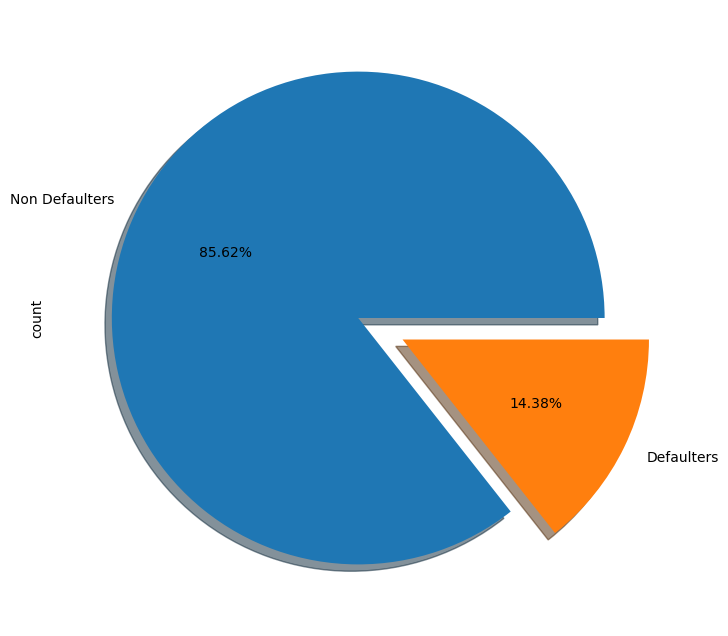

In [188]:
# Plotting 'Defaulters' and 'Non-Defaulters' distribution
plt.figure(figsize=(15, 8))
labels = "Non Defaulters", "Defaulters"
input_file['loan_status'].value_counts().plot.pie(explode=[0,0.2],autopct='%.2f%%',labels=labels,shadow=True)
plt.show()

_**Percentage of Defaulters in this data is: 14.38%**_

In [189]:
# Function to create the plot based on the given parameter with our target variable i,e loan_status 
def plot_uni_data(data1):
    plt.figure(figsize=(15, 8))
    plot=sns.barplot(x = data1, y = 'loan_status', data=input_file)
    plot.set(ylabel = 'Loan Defaults')
    plt.show()

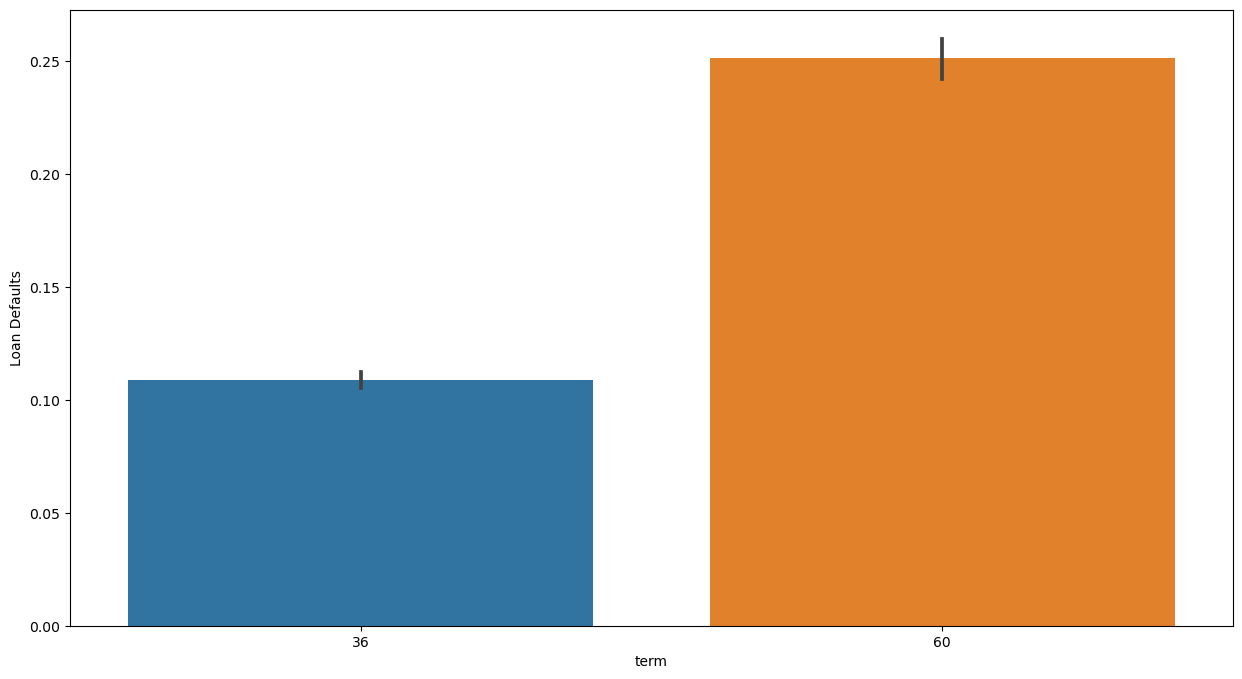

In [190]:
#Plot for Term vs Loan Status
plot_uni_data('term')

# Inference #1:

- <font color=blue> _**From the above barplot (‘term’ and 'loan_status'), we can conclude that the defaulters rate is increasing with term.**_</font> 

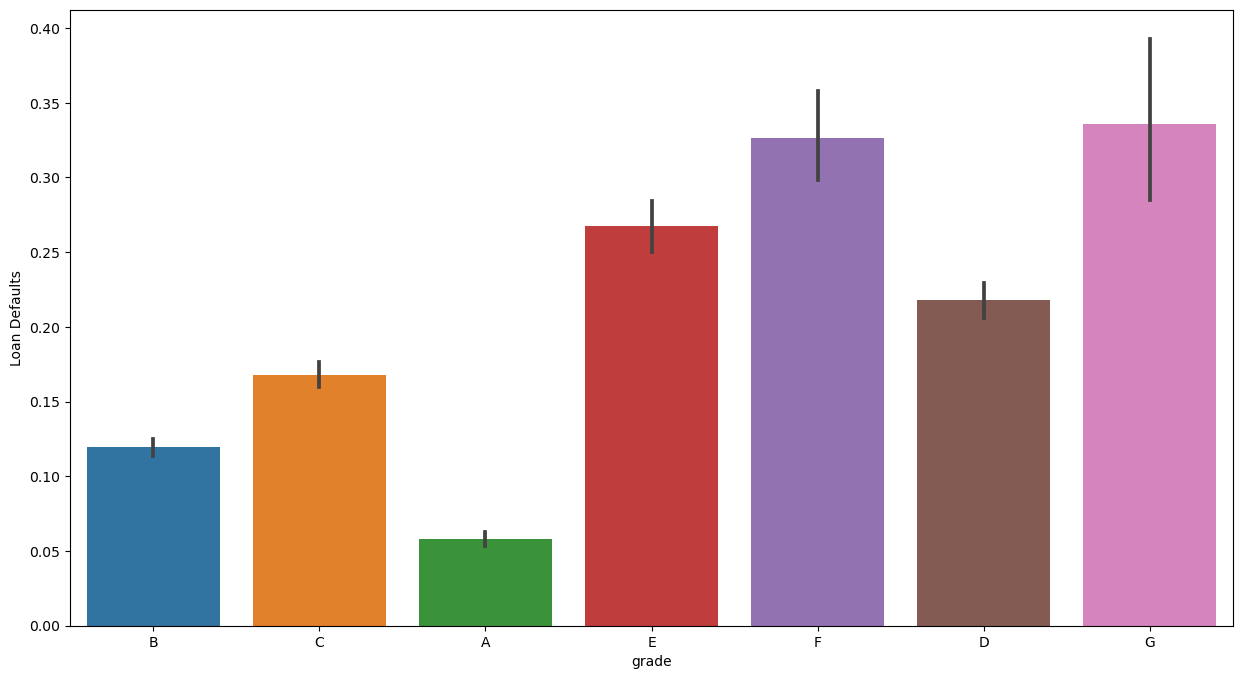

In [191]:
#Plot for Grade vs Loan Status
plot_uni_data('grade')

# Inference #2:



- <font color=blue> _**From the above barplot (‘grade’ and 'loan_status'), we can conclude that the defaulters rate is increasing with grade from A to G.**_</font> 

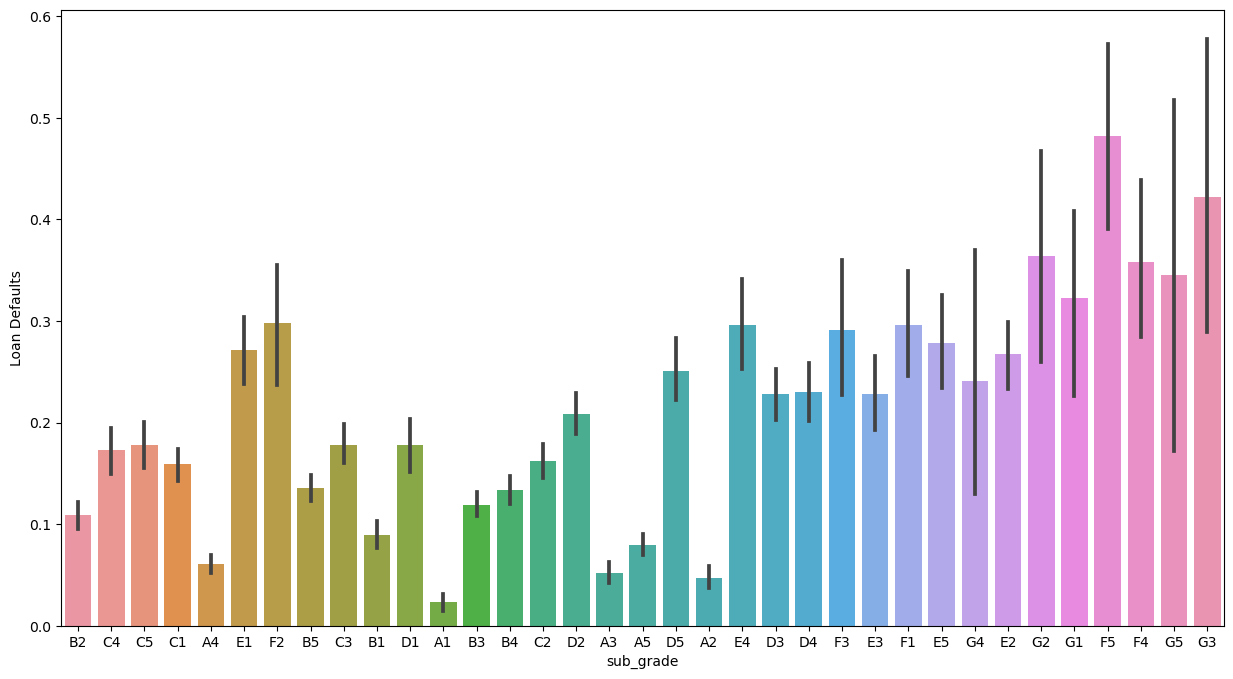

In [192]:
#Plot for Sub-Grade vs Loan Status
plot_uni_data('sub_grade')

# Inference #3:

- <font color=blue> _**From the above barplot (‘sub_grade’ and 'loan_status'), we can conclude that the defaulters rate is increasing with sub_grade from A1 to G5.**_</font> 

In [193]:
input_file['int_rate'].describe()

count    37544.000000
mean        11.963319
std          3.683012
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

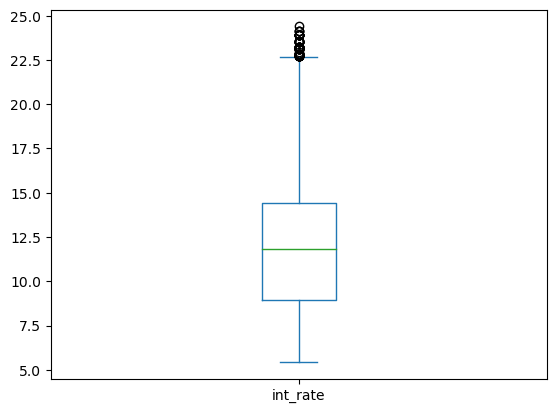

In [194]:
input_file['int_rate'].plot.box()
plt.show()

In [195]:
# Created bins:
# for int_rate range using the metrics from describe function and outliers from box plot

bins = [5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25]
bucket_int = ['5-7.5', '7.5-10', '10-12.5', '12.5-15', '15-17.5', '17.5-20','20-22.5', '22.5-25']
input_file['int_rate_range'] = pd.cut(input_file['int_rate'], bins, labels=bucket_int)

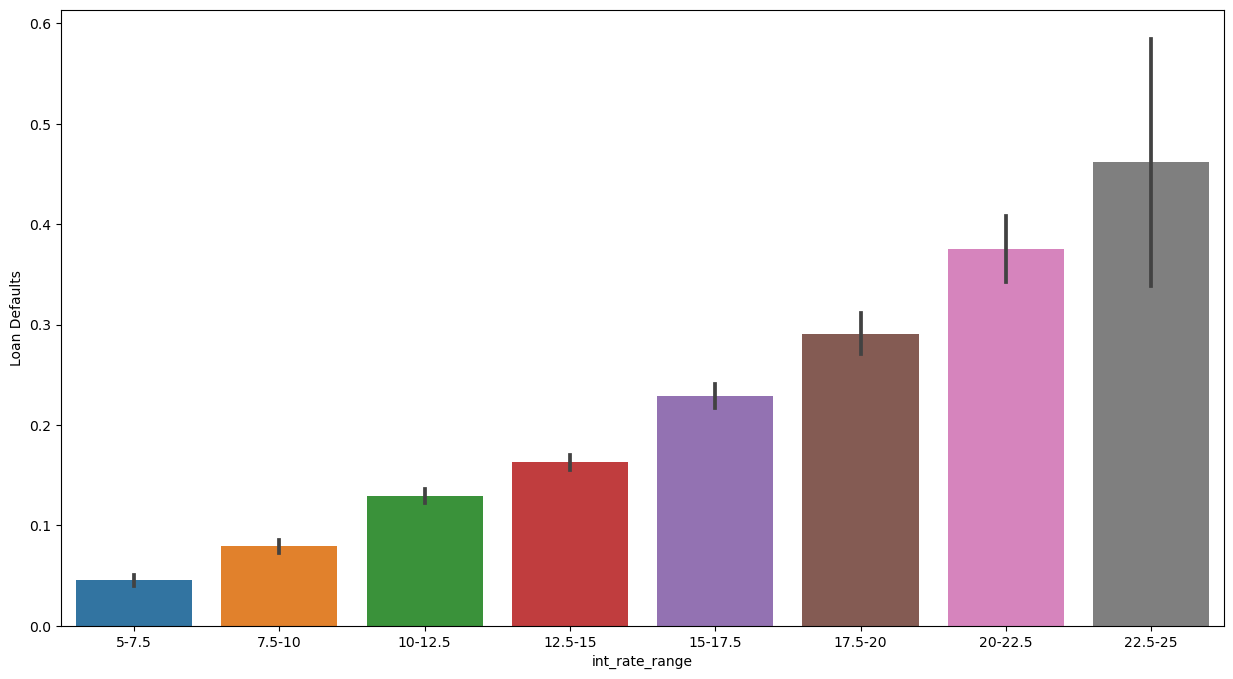

In [196]:
#Plot for Interest rate range  vs Loan Status
plot_uni_data('int_rate_range')

# Inference #4:



- <font color=blue> _**From the above barplot (‘int_rate_range’ and 'loan_status'), we can conclude that the defaulters rate is increasing with interest rate.**_</font> 

In [197]:
#checking metrics for loan_amnt column
input_file['loan_amnt'].describe()

count    37544.000000
mean     11119.329986
std       7354.098954
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

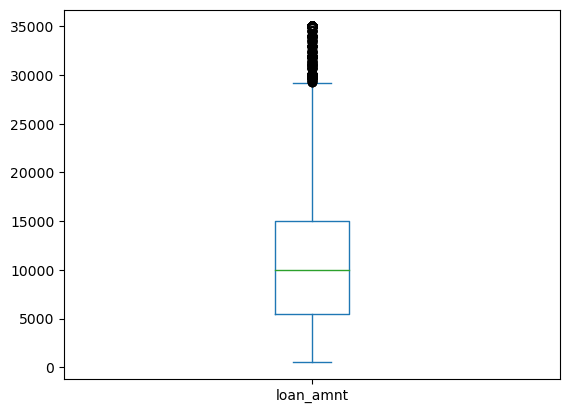

In [198]:
#Boxplot for loan_amnt column
input_file['loan_amnt'].plot.box()
plt.show()

In [199]:
# Created bins 
# for loan_amnt range using metrics from describe function and outliers from box plot
bins = [500, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
bucket_amt = ['500-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000-30000','30000-35000']
input_file['loan_amt_range'] = pd.cut(input_file['loan_amnt'], bins, labels=bucket_amt)

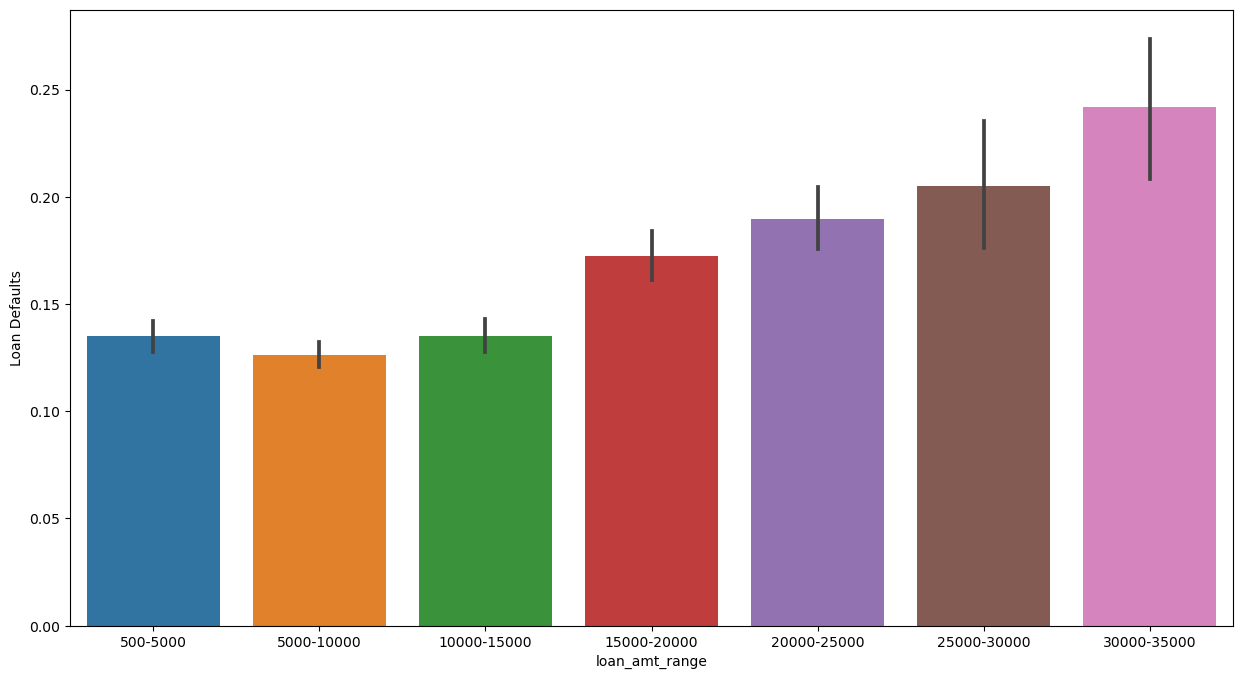

In [200]:
#Plot for Loan Range vs Loan Status
plot_uni_data('loan_amt_range')

# Inference #5:

- <font color=blue> _**From the above barplot (‘loan_amt_range’ and 'loan_status'), we can conclude that the defaulters rate is increasing with loan amount .**_</font> 

In [201]:
#checking metrics for dti column
input_file['dti'].describe()

count    37544.000000
mean        13.284186
std          6.660551
min          0.000000
25%          8.160000
50%         13.380000
75%         18.550000
max         29.990000
Name: dti, dtype: float64

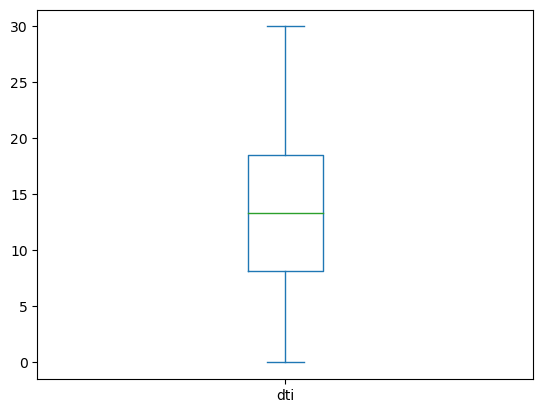

In [202]:
#Boxplot for dti column
input_file['dti'].plot.box()
plt.show()

In [203]:
# created bins for dti range using metrics from describe function
bins = [0, 5.00, 10.00, 15.00, 20.00, 25.00, 30.00]
bucket_dti = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30']
input_file['dti_range'] = pd.cut(input_file['dti'], bins, labels=bucket_dti)

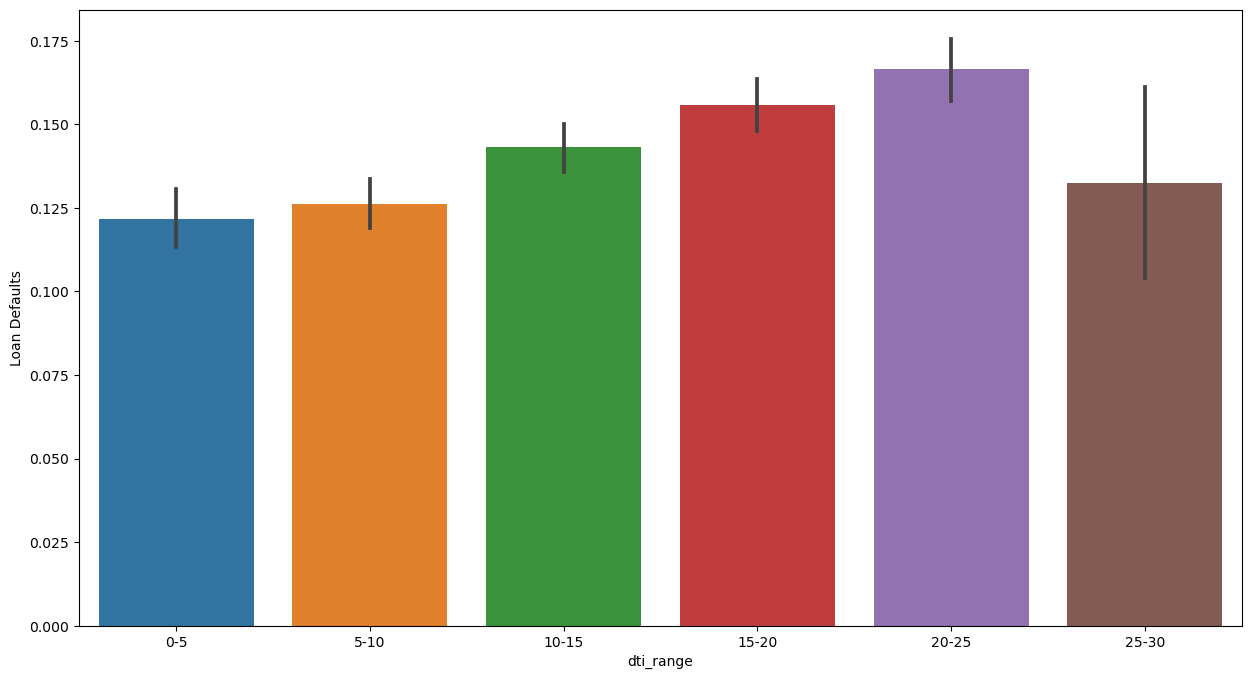

In [204]:
#Plot for DTI Range vs Loan Status
plot_uni_data('dti_range')

# Inference #6:

- <font color=blue> _**From the above barplot (‘dti_range’ and 'loan_status'), we can conclude that the defaulters rate is increasing with dti(debt to income) with maximum around 20-25 range .**_</font> 

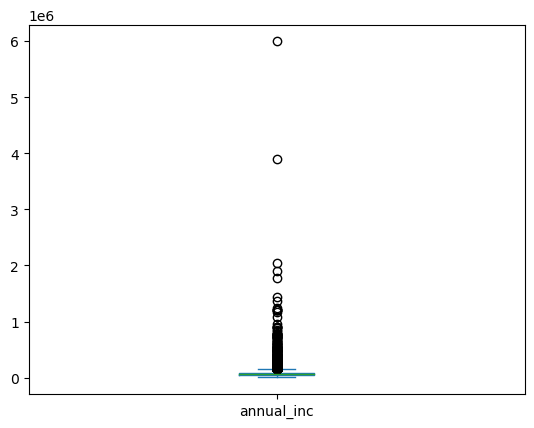

In [205]:
# Boxplot for 'annual_inc' variable
input_file['annual_inc'].plot.box() 
plt.show()

In [206]:
#checking metrics for annual_inc column
input_file['annual_inc'].describe()

count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [207]:
# created bins for annual_inc range using metrics from describe function and boxplot
bins = [0, 41000, 60000, 83000,600000]
bucket_inc = ['0-41000', '41000-60000', '60000-83000','83000+']
input_file['annual_inc_range'] = pd.cut(input_file['annual_inc'], bins, labels=bucket_inc)

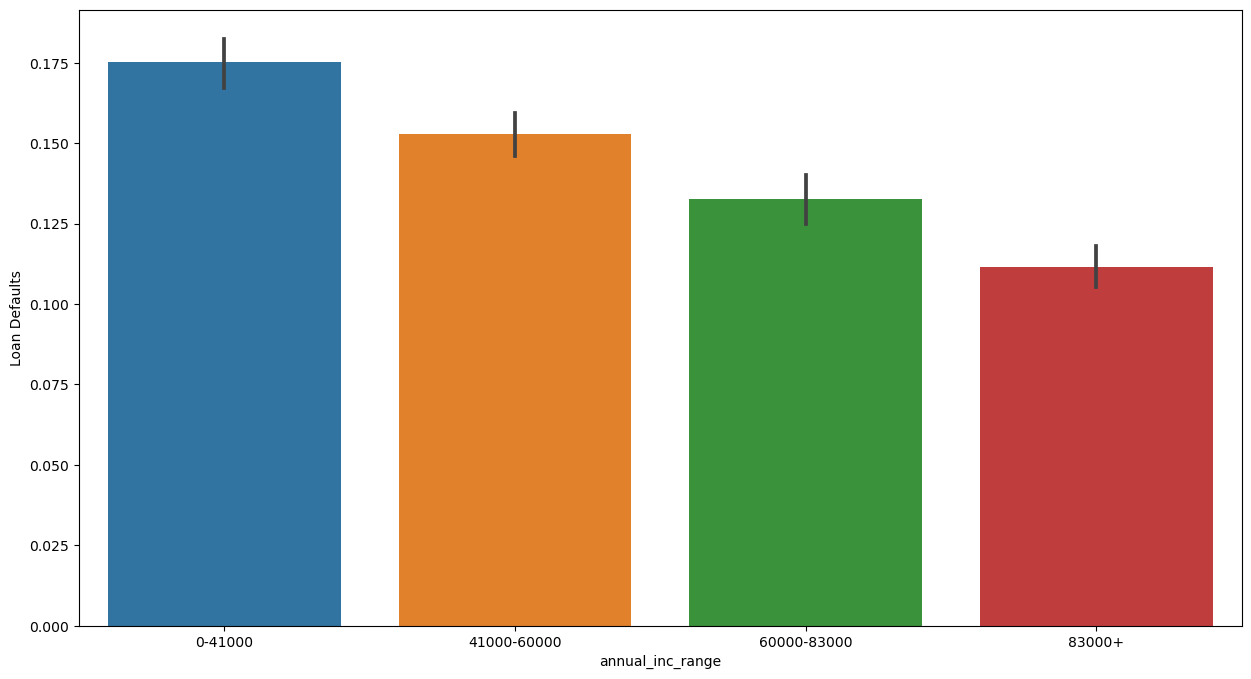

In [208]:
#Plot for Annual Income range vs Loan Status
plot_uni_data('annual_inc_range')

# Inference #7:

- <font color=blue> _**From the above barplot (‘annual_inc_range’ and 'loan_status'), we can conclude that the defaulters rate is decreasing with annual_inc_range.**_</font> 

In [209]:
#checking metrics for installment column
input_file['installment'].describe()

count    37544.000000
mean       324.650164
std        208.901055
min         15.690000
25%        167.370000
50%        280.000000
75%        428.942500
max       1305.190000
Name: installment, dtype: float64

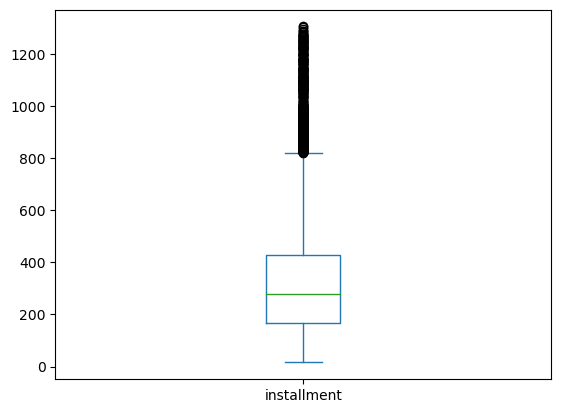

In [210]:
#Boxplot for installment column
input_file['installment'].plot.box()
plt.show()

In [211]:
# created bins for installment range using metrics from decsribe and boxplot
bins = [0, 200, 400, 600, 800, 1400]
bucket_instlmnt = ['0-200', '200-400', '400-600', '600-800', '800-1400']
input_file['installment_range'] = pd.cut(input_file['installment'], bins, labels=bucket_instlmnt)

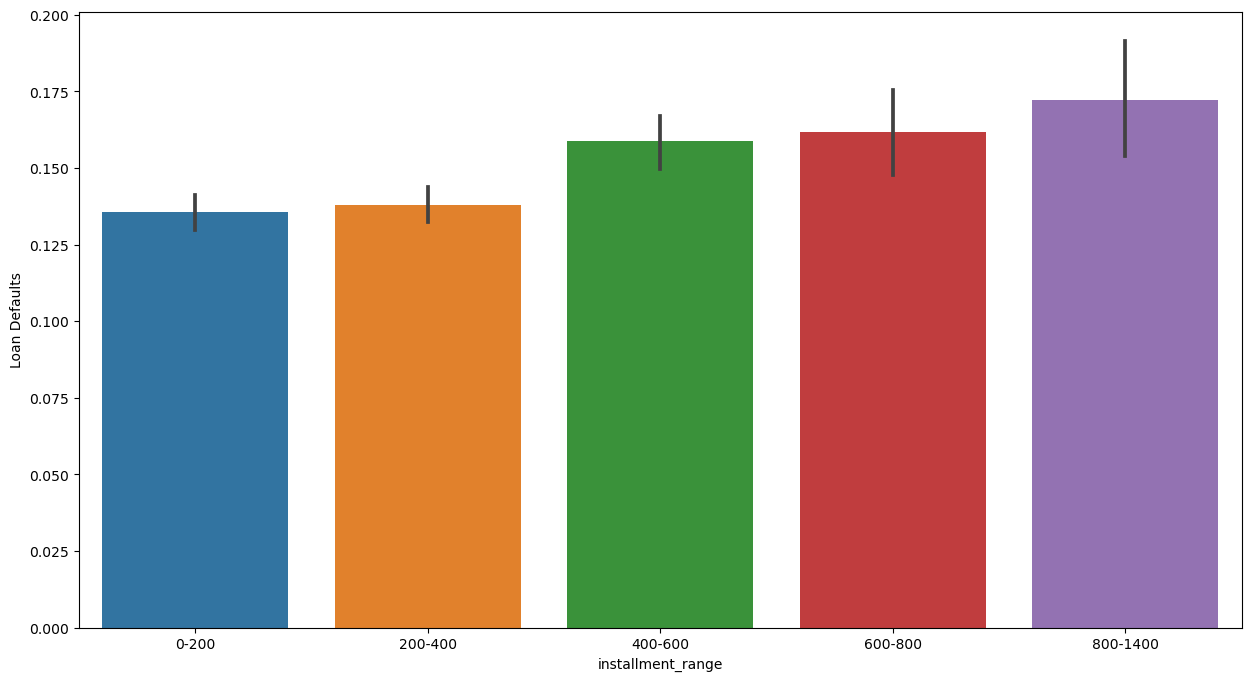

In [212]:
#Plot for Installment range vs Loan Status
plot_uni_data('installment_range')

# Inference #8:

- <font color=blue> _**From the above barplot (‘installment_range’ and 'loan_status'), we can conclude that the defaulters rate is increasing with installment range.**_</font> 

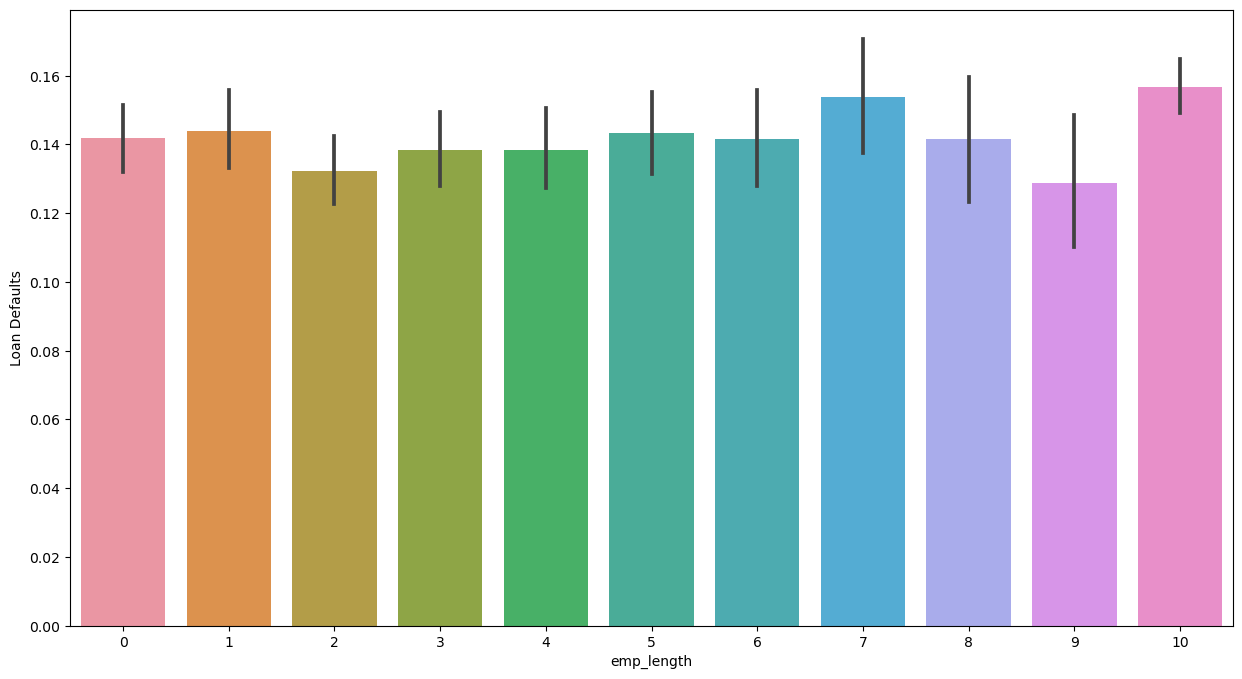

In [213]:
#Plot for Employee Length vs Loan Status
plot_uni_data('emp_length')

# Inference #9:

- <font color=blue> _**From the above barplot (‘emp_length’ and 'loan_status'), we can conclude that the defaulters rate is almost same among all employment length.Therefore, defaulter rate does not depend on emp_length**_</font> 

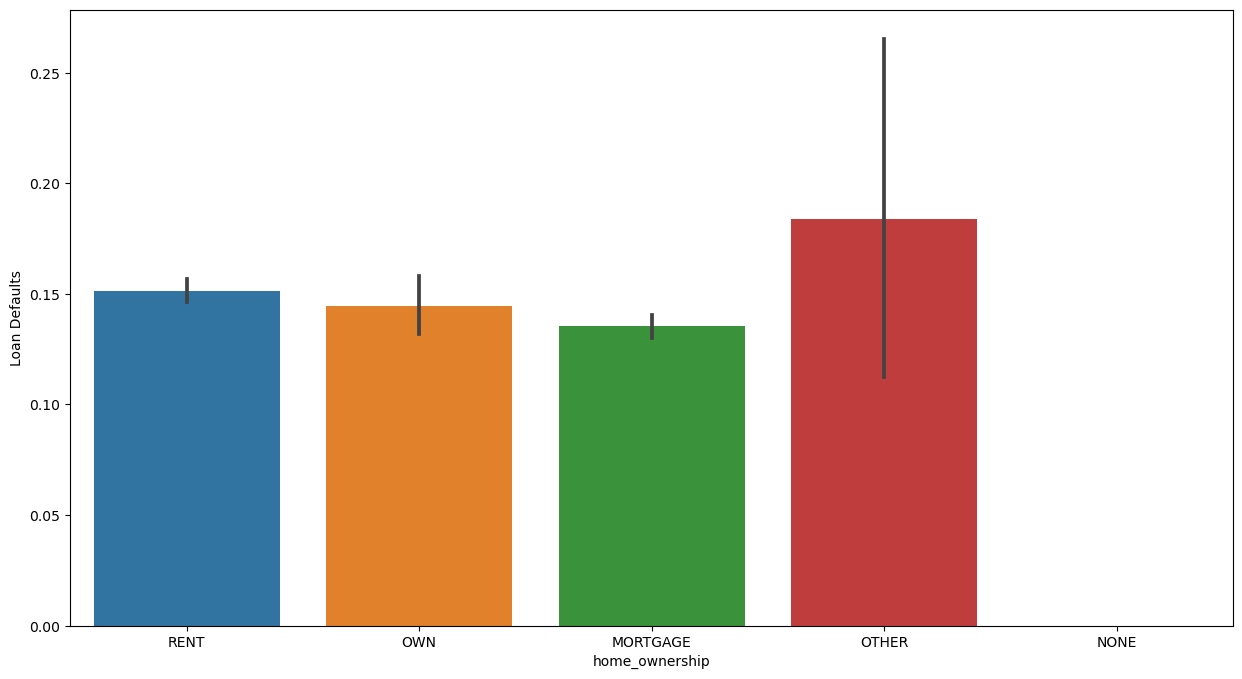

In [214]:
#Plot for Home Ownership vs Loan Status
plot_uni_data('home_ownership')

# Inference #10:

- <font color=blue> _**From the above barplot (‘home_ownership’ and 'loan_status'), there is no clear pattern that emerges implicitly. However there is an exception with regards to "Others" home ownership type where defaults are significantly higher than other catergories. Hence in absence of a clear pattern, discarding this variable for analysis.**_</font> 

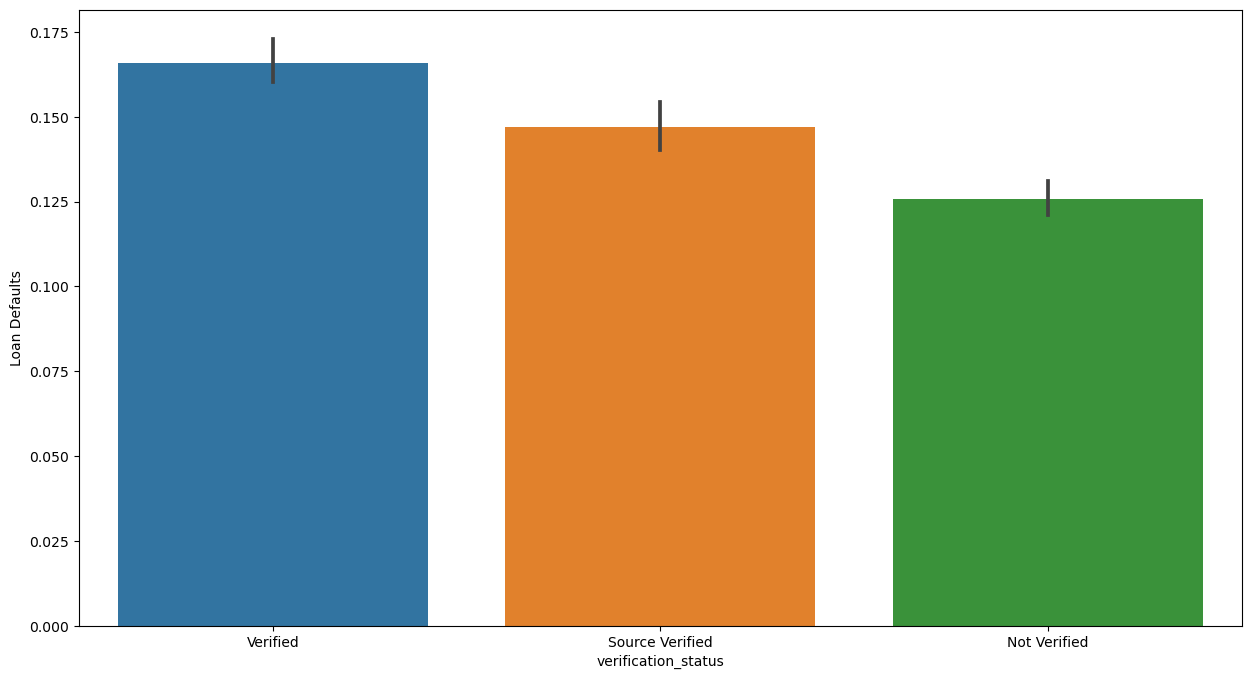

In [215]:
#Plot for Verification Status vs Loan Status
plot_uni_data('verification_status')

# Inference #11:

- <font color=blue> _**From the above barplot (‘verification_status’ and 'loan_status'), there is a clear pattern infering that defaults are more for verified (verification_status).**_</font> 

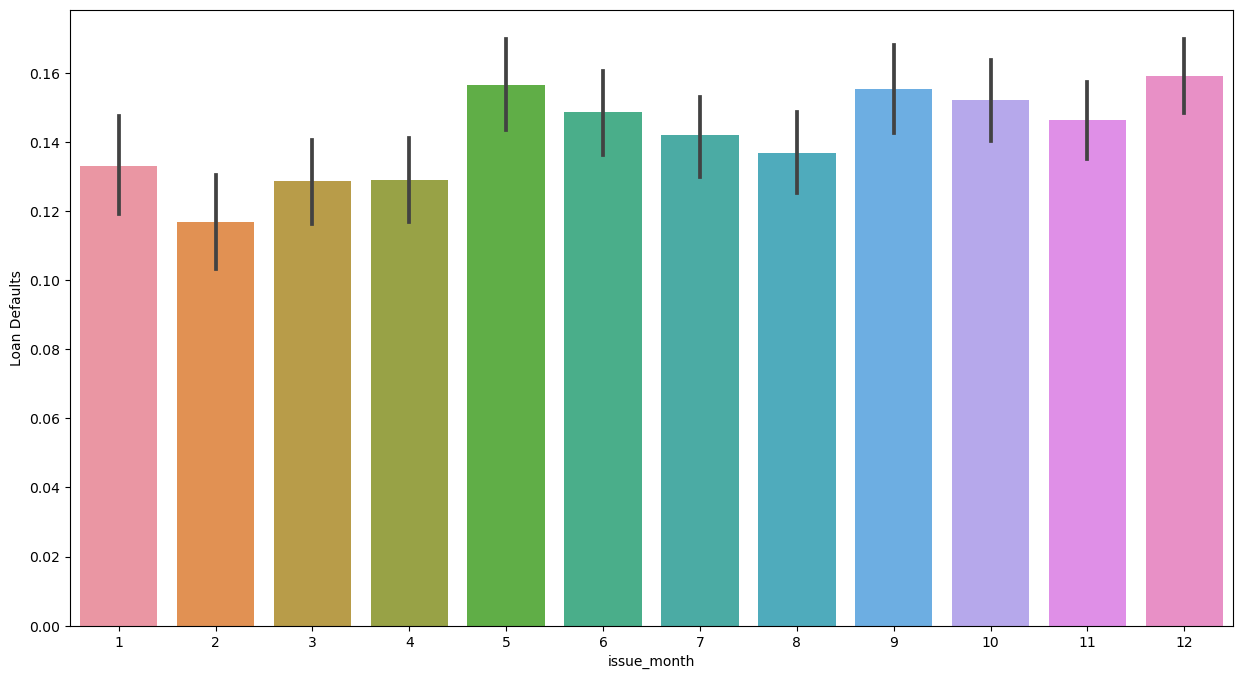

In [216]:
#Plot for Issue Month vs Loan Status
plot_uni_data('issue_month')

## Inference #12:

- <font color=blue> _**From the above barplot (‘issue_month’ and 'loan_status'), there is no clear pattern, hence discarding this variable for analysis.**_</font> 

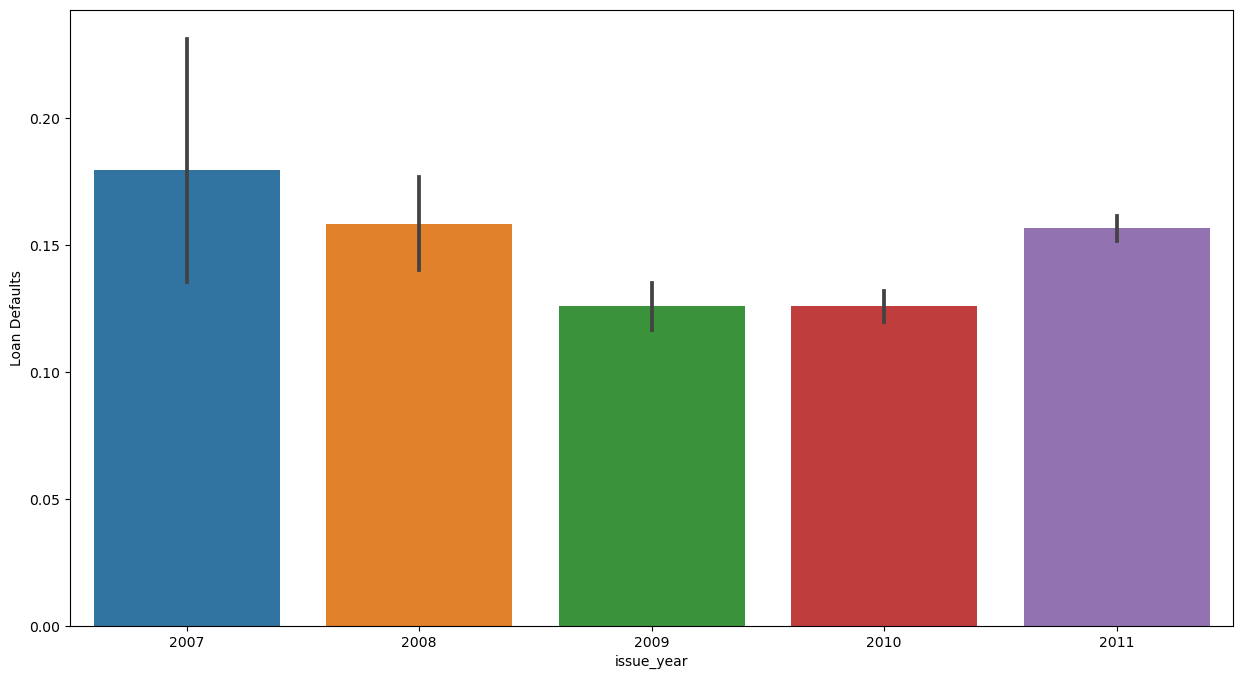

In [217]:
#Plot for Issue year vs Loan Status
plot_uni_data('issue_year')

## Inference #13:

- <font color=blue> _**From the above barplot (‘issue_year’ and 'loan_status'), there is no clear pattern hence discarding this variable for analysis.**_</font> 

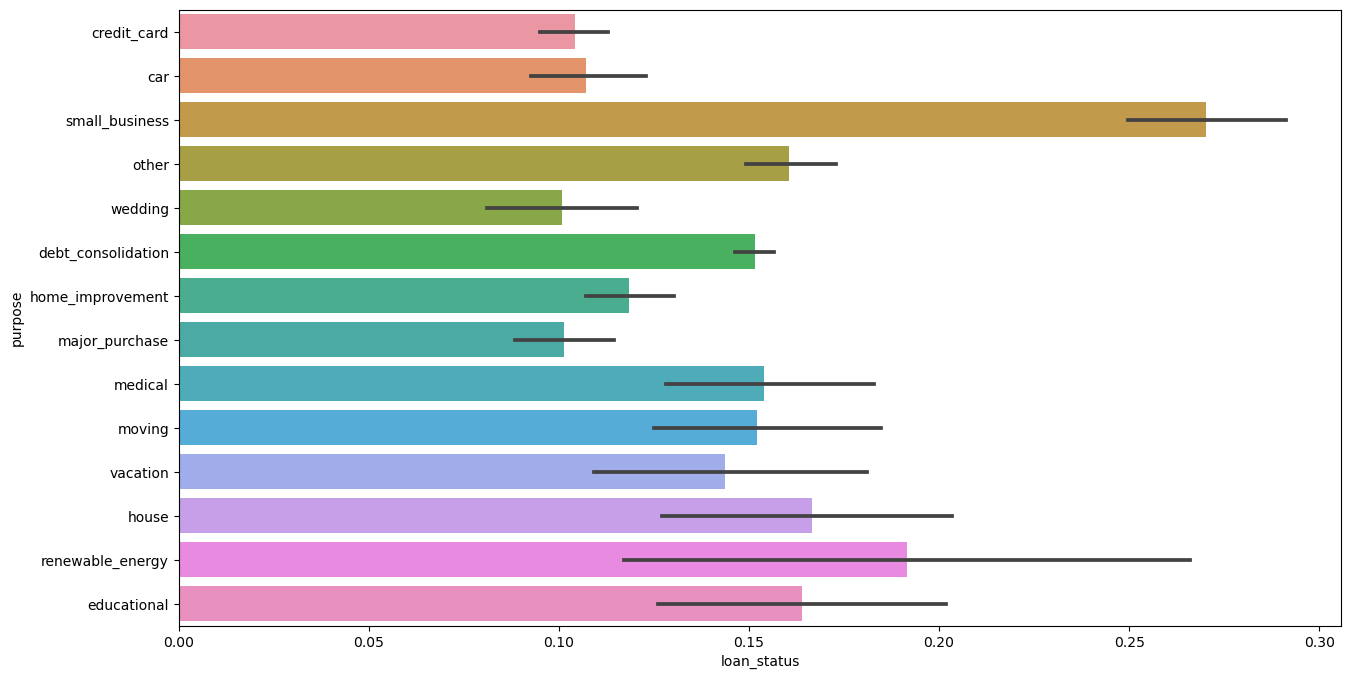

In [218]:
#Plot for Purpose vs Loan Status

plt.figure(figsize=(15, 8))
plot=sns.barplot(x='loan_status', y= 'purpose', data=input_file)
plt.show()

## Inference #14:

- <font color=blue> _**From the above barplot (‘purpose’ and 'loan_status'), it is clearly evident that defaults is maximum for "small business".**_</font> 

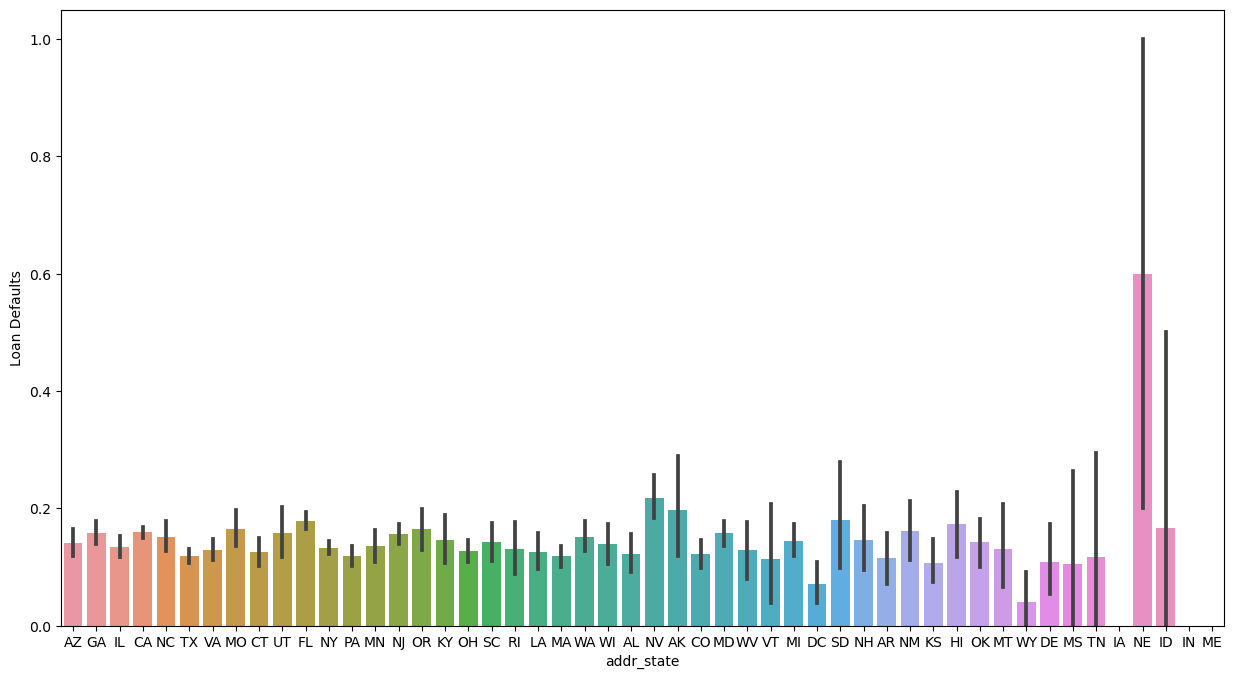

In [219]:
#Plot for Address state vs Loan Status
plot_uni_data('addr_state')

## Inference #15:

- <font color=blue> _**From the above barplot (‘addr_state’ and 'loan_status'), it comes out that for "NE" the defaults spike significantly higher than others. Statiscally its surprising that there are no defaults for IA, IN & ME.**_</font> 

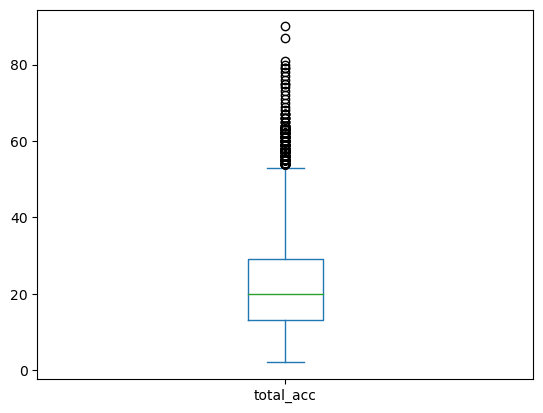

In [220]:
#Boxplot for total_acc column
input_file['total_acc'].plot.box()
plt.show()

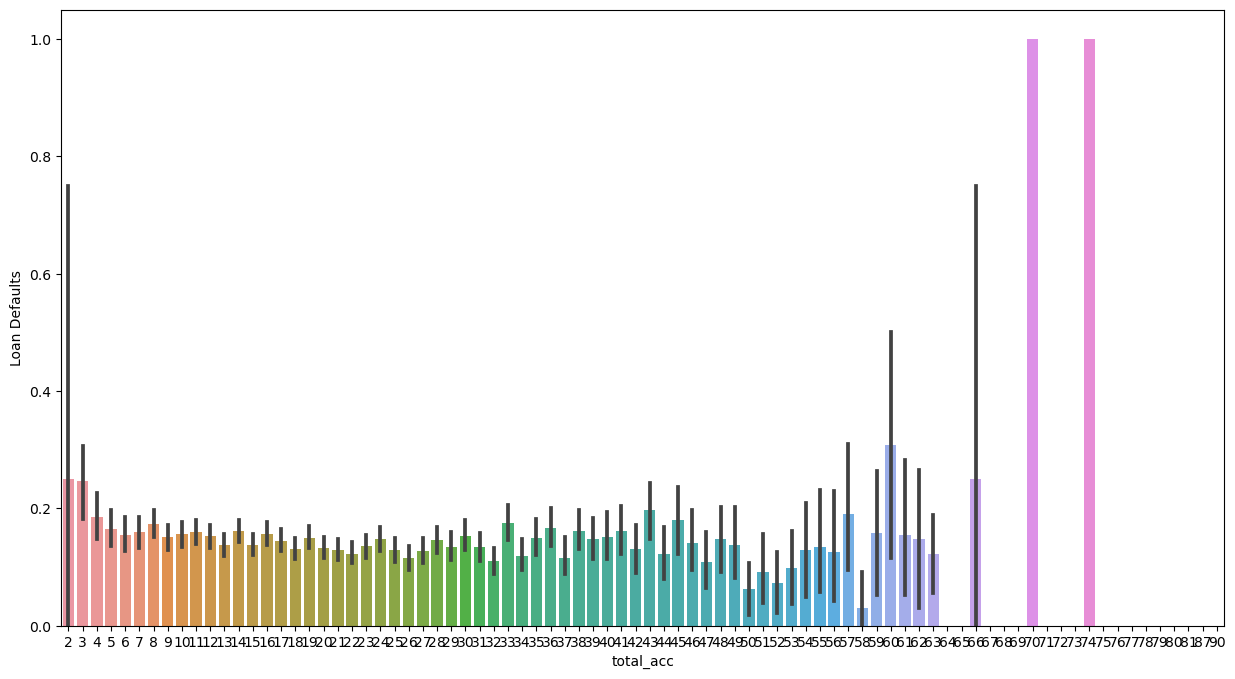

In [221]:
#Plot for Total Accounts vs Loan Status
plot_uni_data('total_acc')


## Inference #16:

- <font color=blue> _**From the above barplot (‘total_acc’ and 'loan_status'), it comes out that defaults is almost constant across with only couple of exceptions due to outliers in data (checked through box plot).**_</font> 

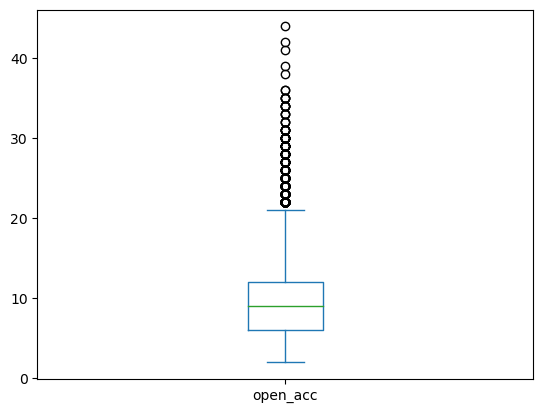

In [222]:
#Boxplot for open_acc column
input_file['open_acc'].plot.box()
plt.show()

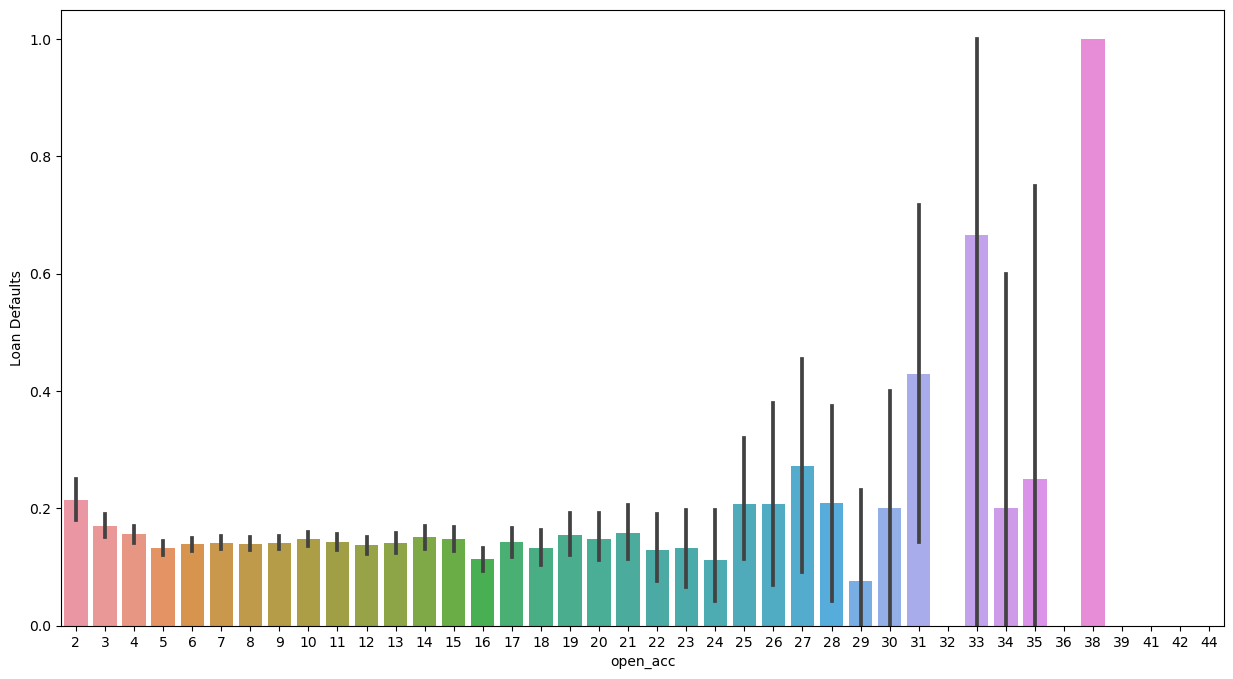

In [223]:
#Plot for Opened Accounts vs Loan Status
plot_uni_data('open_acc')

## Inference #17:

- <font color=blue> _**From the above barplot (‘open_acc’ and 'loan_status'), it comes out that defaults is almost constant across with only couple of exceptions due to outliers in data (checked through box plot).**_</font> 

In [224]:
#checking metrics for funded_amnt_inv column
input_file['funded_amnt_inv'].describe()

count    37544.000000
mean     10280.495739
std       7034.124211
min          0.000000
25%       5000.000000
50%       8850.000000
75%      14075.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

<Axes: >

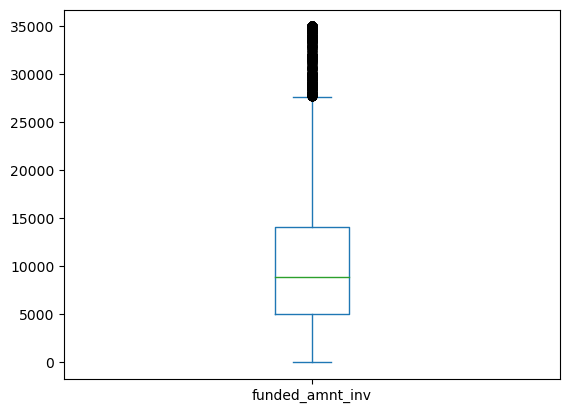

In [225]:
input_file['funded_amnt_inv'].plot.box()

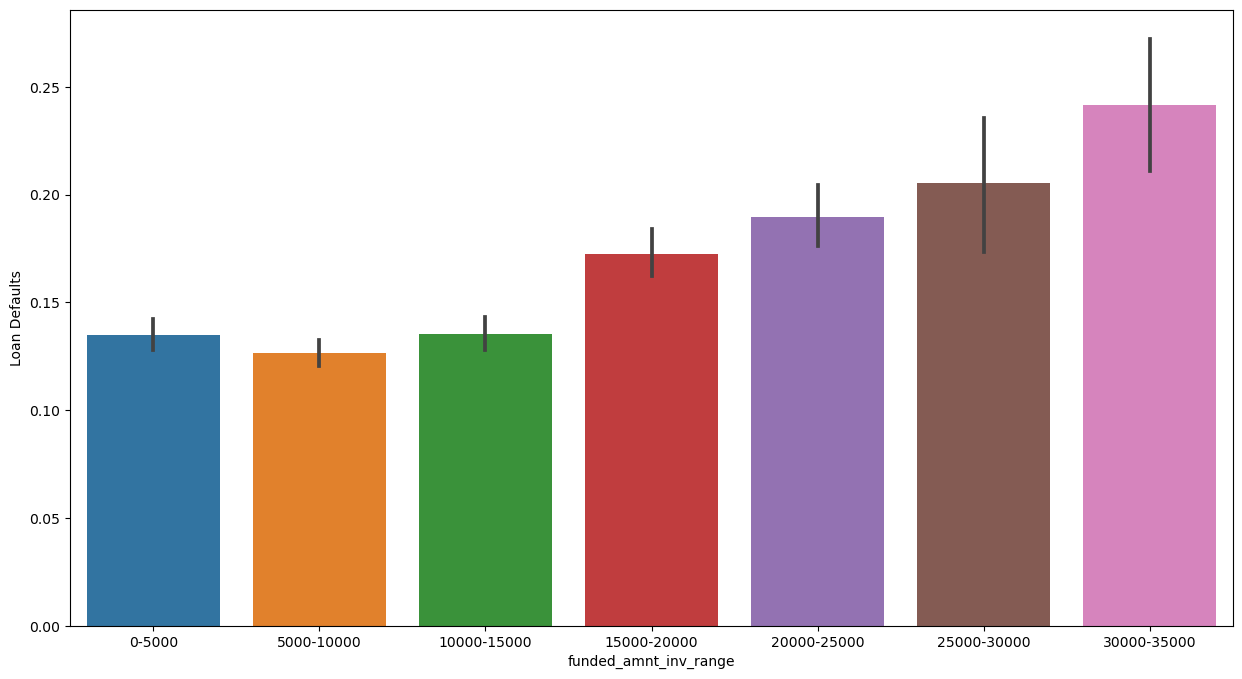

In [226]:
# created bins for funded_amnt_inv range using metrics from describe function and outliers from box plot
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
bucket_inv_amt = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000-30000','30000-35000']
input_file['funded_amnt_inv_range'] = pd.cut(input_file['loan_amnt'], bins, labels=bucket_inv_amt)

#Plot for Installment range vs Loan Status
plot_uni_data('funded_amnt_inv_range')

- <font color=blue> _**From the above barplot (‘funded_amnt_inv_range’ and 'loan_status'), we can conclude that the defaulters rate is increasing with funding_amnt_inv_range.**_</font> 

# Bivariate Analysis  --  Target Variable is loan_status

In [227]:
# Function to draw plots for bi-variate analysis

def plot_bi_data(data1,hue):
    plt.figure(figsize=(15, 8))
    plot=sns.barplot(x = data1, y = 'loan_status', hue=hue, data=input_file)
    plot.set(ylabel = 'Loan Defaults')
    plt.show()

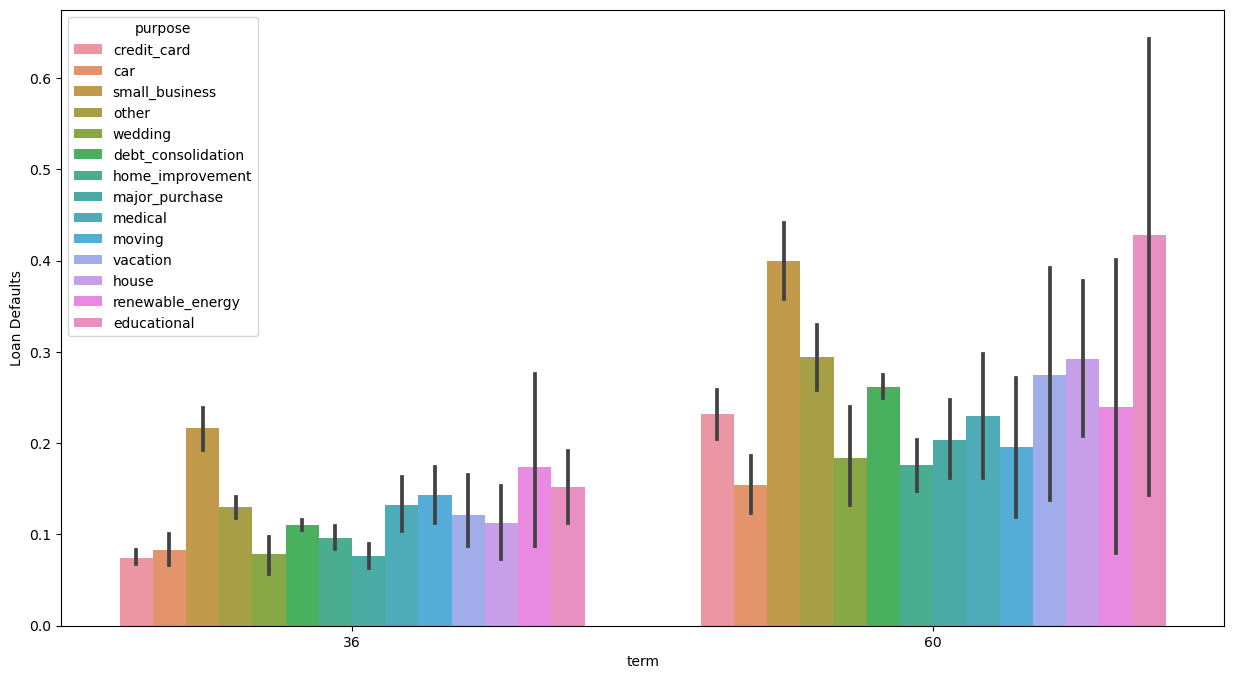

In [228]:
plot_bi_data('term','purpose')

## Inference # 18:

- <font color=blue> _**From the above barplot ('term', 'purpose' and 'loan_status'), it comes out clearly that defaults increase with increase in term period across all purpose.**_</font> 

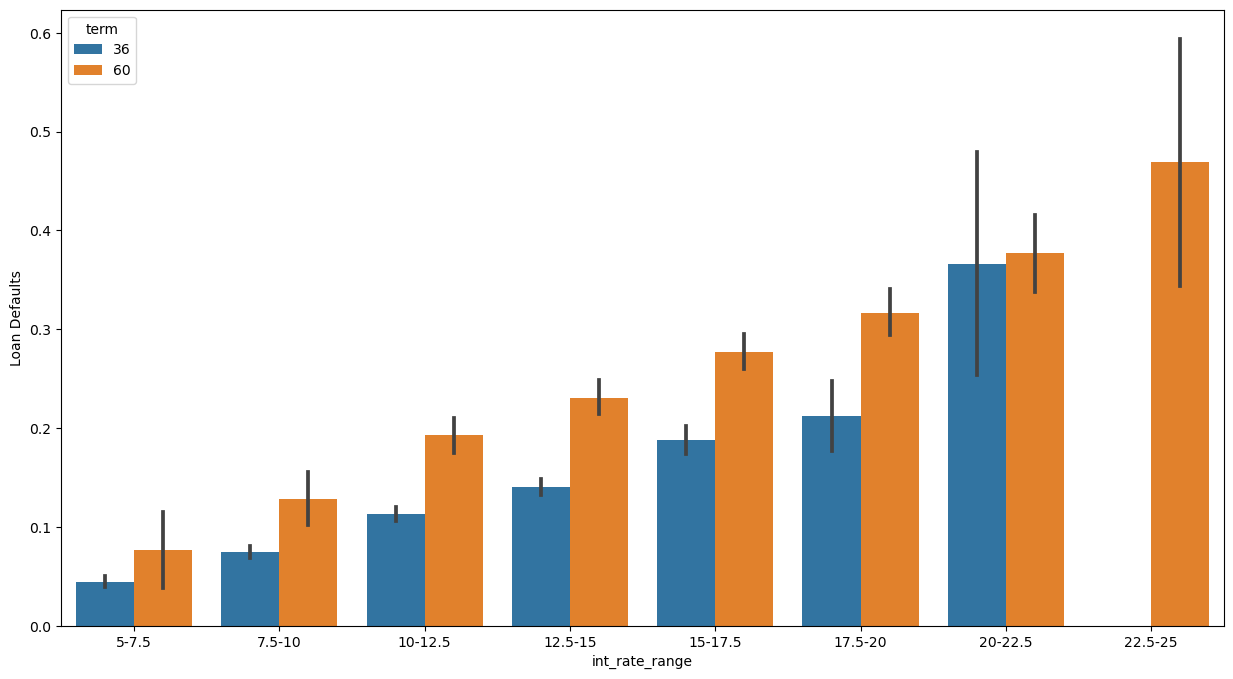

In [229]:
plot_bi_data('int_rate_range','term')

## Inference #19:

- <font color=blue> _**From the above barplot ('interest rate', 'term' and 'loan_status'), its clearly evident that defaults increase as interest rates increase for both terms.**_</font> 

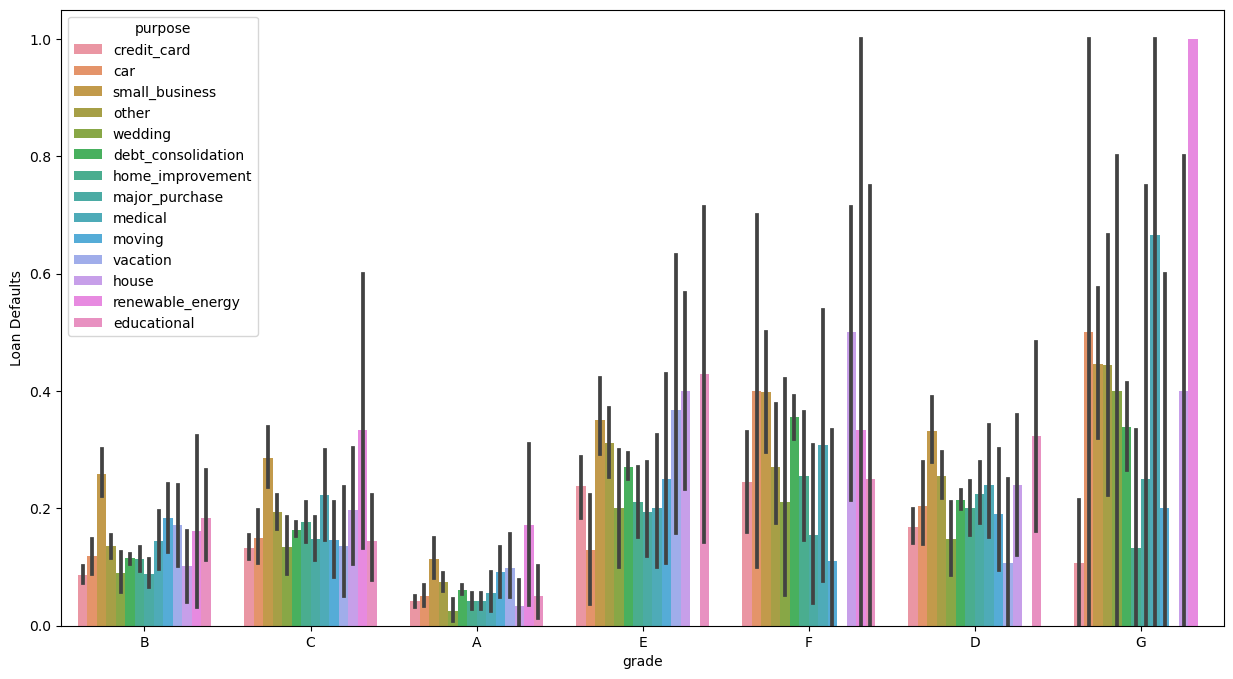

In [230]:
plot_bi_data('grade','purpose')

## Inference #20:

- <font color=blue> _**From the above barplot ('grade', 'purpose' and 'loan_status'), defaults increase as we move to higher grades(A-G) across all purposes.**_</font> 

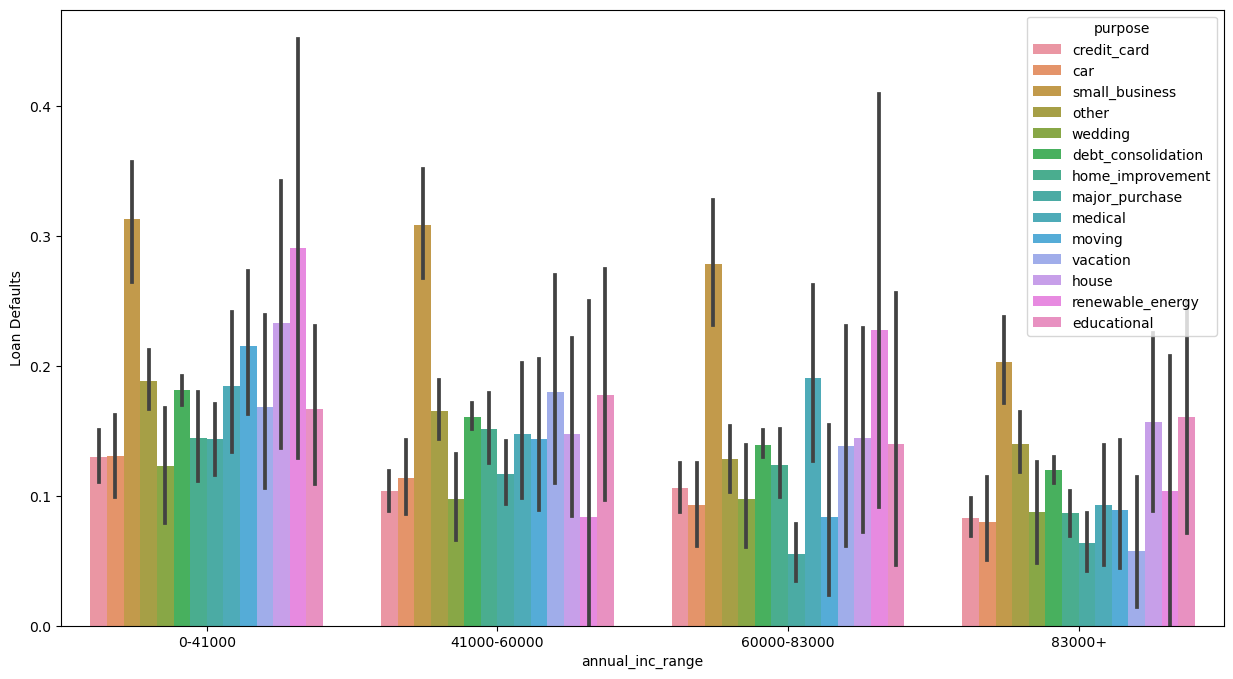

In [231]:
plot_bi_data('annual_inc_range','purpose')

## Inference #21:

- <font color=blue> _**It is clearly evident from above that as annual income increases across all purpose, default decreases.**_</font> 

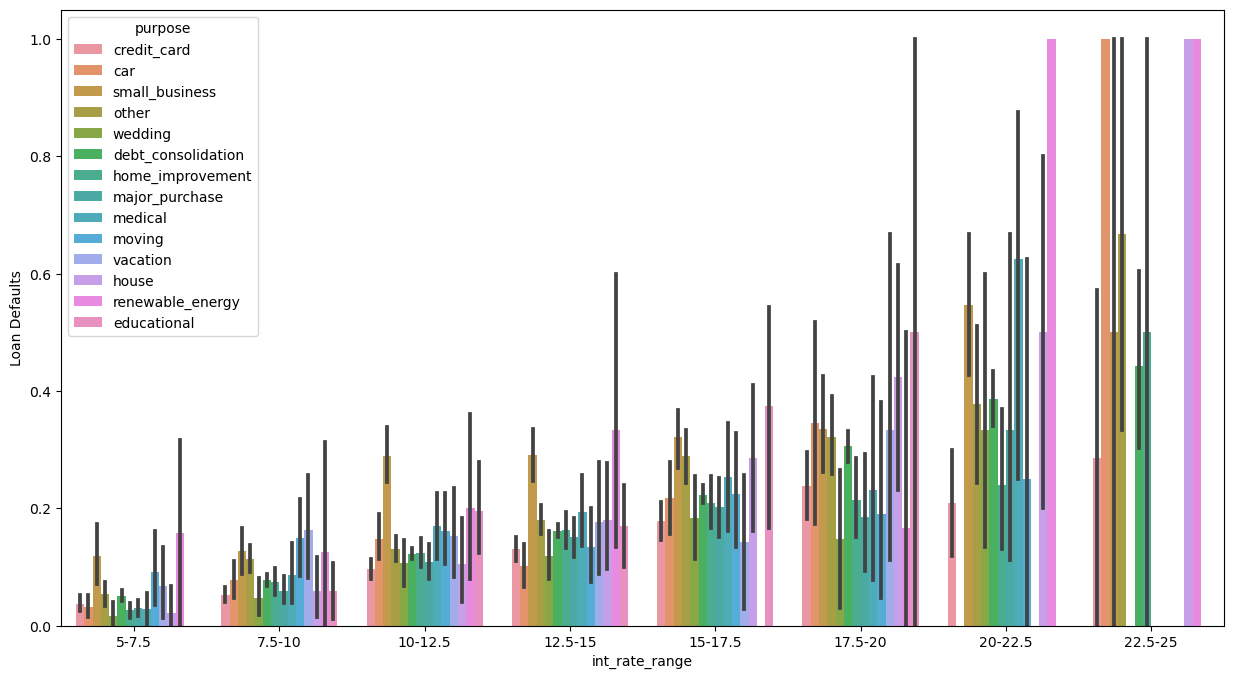

In [232]:
plot_bi_data('int_rate_range','purpose')

## Inference #22:

- <font color=blue> _**Per above its clearly evident that as interest rate increases the defaults increase across all purpose.**_</font> 

In [233]:
input_file['funded_amnt_inv'].describe()

count    37544.000000
mean     10280.495739
std       7034.124211
min          0.000000
25%       5000.000000
50%       8850.000000
75%      14075.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [234]:
# Defining the category for each loan amoount on the basis of quantiles 
fstquant = input_file['funded_amnt_inv'].quantile(0.25)
secquant = input_file['funded_amnt_inv'].quantile(0.50)
thrdquant = input_file['funded_amnt_inv'].quantile(0.75)

def def_loan_category(loan_amnt):
    if loan_amnt <= fstquant:
        return 'Small'
    if (loan_amnt > fstquant) & (loan_amnt <= secquant):
        return 'Medium'
    elif (loan_amnt > secquant) & (loan_amnt <= thrdquant):
        return 'Large'
    else:
        return 'Very Large'

input_file['loan_category'] = input_file[['funded_amnt_inv']].applymap(lambda value : def_loan_category(value))
input_file['loan_category'].value_counts()

loan_category
Small         10278
Very Large     9385
Large          9376
Medium         8505
Name: count, dtype: int64

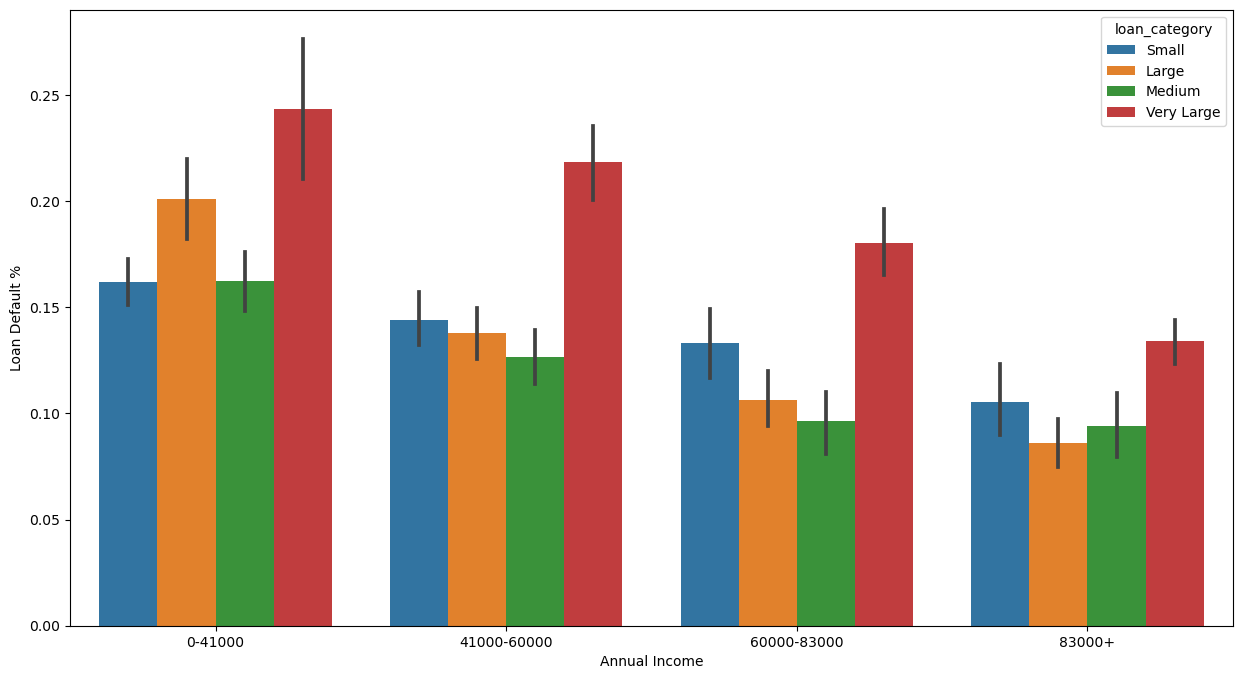

In [235]:
#plot between annual_inc_range, funded_amnt_inv and loan_status
plt.figure(figsize=(15, 8))
plot = sns.barplot(x="annual_inc_range", y = "loan_status" , hue="loan_category", data = input_file)
plot.set(xlabel='Annual Income', ylabel='Loan Default %')

plt.show()

- <font color=blue> _**It comes out that for income group <41K, the defaults are maximum specifically for Very Large loans.**_</font> 

In [236]:
input_file.describe()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,issue_d,loan_status,dti,open_acc,total_acc,issue_month,issue_year
count,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,3.754400e+04,37544,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000
mean,11119.329986,10280.495739,41.917537,11.963319,324.650164,4.940976,6.940708e+04,2010-10-22 02:03:20.980183296,0.143805,13.284186,9.298476,22.083875,7.112881,2010.298530
min,500.000000,0.000000,36.000000,5.420000,15.690000,0.000000,4.000000e+03,2007-06-01 00:00:00,0.000000,0.000000,2.000000,2.000000,1.000000,2007.000000
25%,5500.000000,5000.000000,36.000000,8.940000,167.370000,2.000000,4.100000e+04,2010-05-01 00:00:00,0.000000,8.160000,6.000000,13.000000,4.000000,2010.000000
50%,10000.000000,8850.000000,36.000000,11.830000,280.000000,4.000000,6.000000e+04,2011-01-01 00:00:00,0.000000,13.380000,9.000000,20.000000,7.000000,2011.000000
75%,15000.000000,14075.000000,36.000000,14.420000,428.942500,9.000000,8.300000e+04,2011-08-01 00:00:00,0.000000,18.550000,12.000000,29.000000,10.000000,2011.000000
max,35000.000000,35000.000000,60.000000,24.400000,1305.190000,10.000000,6.000000e+06,2011-12-01 00:00:00,1.000000,29.990000,44.000000,90.000000,12.000000,2011.000000
std,7354.098954,7034.124211,10.344394,3.683012,208.901055,3.557082,6.467698e+04,NaN,0.350896,6.660551,4.396229,11.416494,3.410257,0.889106


In [237]:
numeric_data = input_file.select_dtypes(include=[np.number])

,loan_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,open_acc,total_acc,issue_month,issue_year
loan_amnt,1.000000,0.936871,0.345564,0.299237,0.931686,0.148895,0.266282,0.062680,0.061402,0.174008,0.255538,0.052812,0.115074
funded_amnt_inv,0.936871,1.000000,0.343151,0.295697,0.904110,0.159903,0.249320,0.040097,0.070007,0.159554,0.241953,0.069273,0.259073
term,0.345564,0.343151,1.000000,0.440717,0.087956,0.104577,0.043201,0.175200,0.078386,0.045531,0.095376,0.034794,0.242682
int_rate,0.299237,0.295697,0.440717,1.000000,0.274791,0.000390,0.046092,0.213497,0.112188,0.007594,-0.045310,0.026176,0.044083
installment,0.931686,0.904110,0.087956,0.274791,1.000000,0.121996,0.264684,0.029868,0.050727,0.169816,0.229250,0.029796,0.057550
emp_length,0.148895,0.159903,0.104577,0.000390,0.121996,1.000000,0.110831,0.016126,0.050268,0.096710,0.207738,0.021627,0.118614
annual_inc,0.266282,0.249320,0.043201,0.046092,0.264684,0.110831,1.000000,-0.038501,-0.123582,0.154494,0.233436,0.009557,0.012689
loan_status,0.062680,0.040097,0.175200,0.213497,0.029868,0.016126,-0.038501,1.000000,0.042803,-0.006293,-0.020784,0.025811,0.022816
dti,0.061402,0.070007,0.078386,0.112188,0.050727,0.050268,-0.123582,0.042803,1.000000,0.288942,0.229949,0.012125,0.094332
open_acc,0.174008,0.159554,0.045531,0.007594,0.169816,0.096710,0.154494,-0.006293,0.288942,1.000000,0.686249,0.000471,0.013559


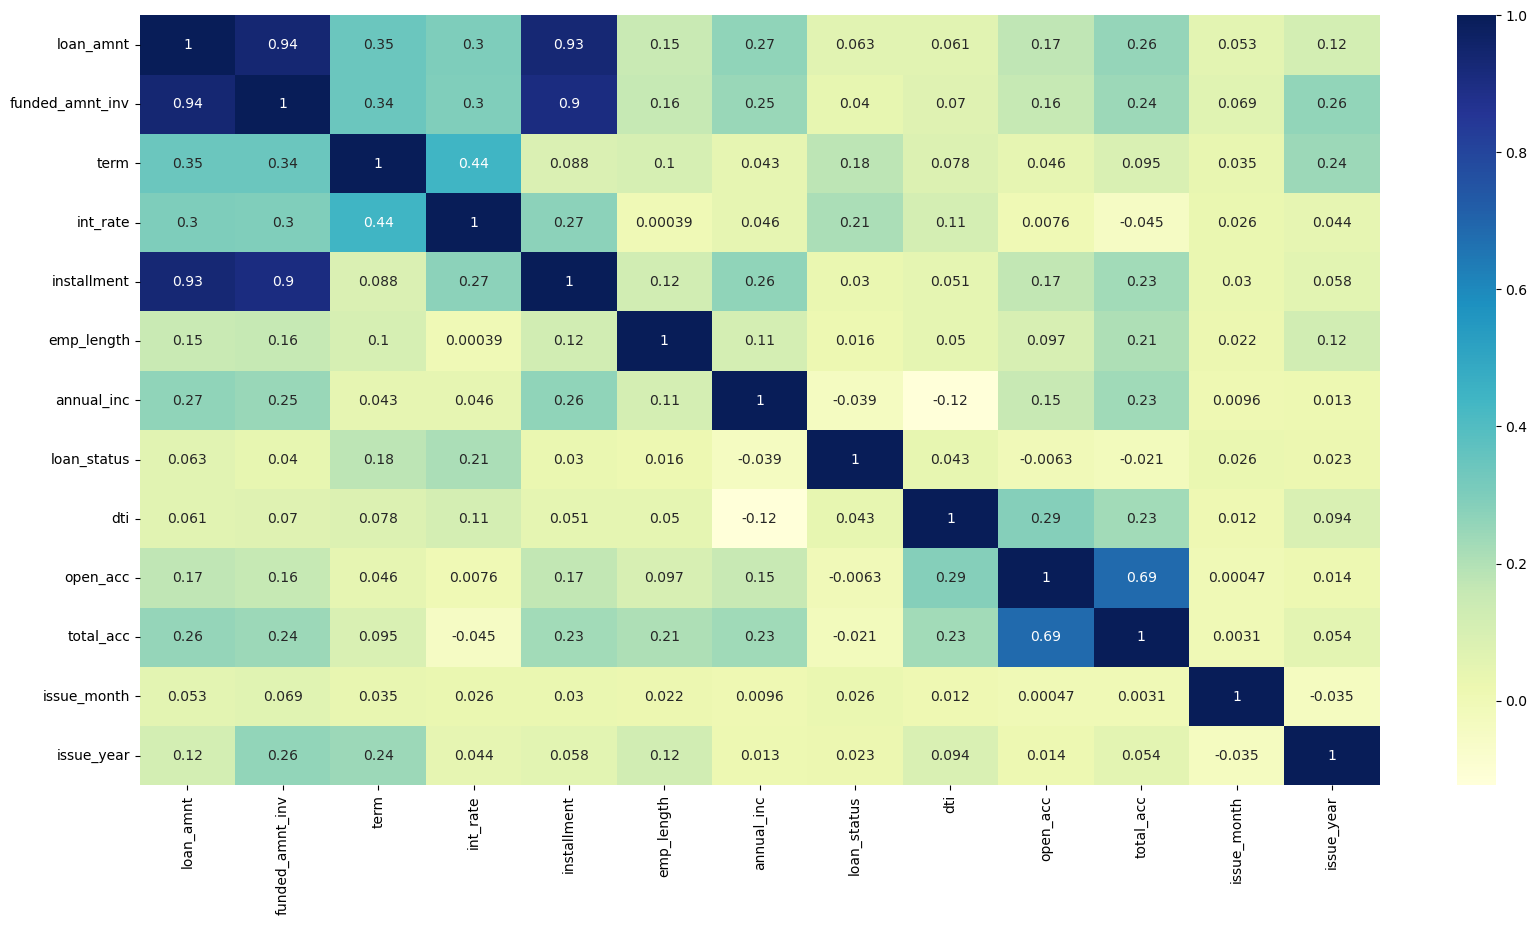

In [238]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
corr= numeric_data.corr()
sns.heatmap(corr,cmap='YlGnBu',annot=True)
corr

- <font color=blue> _**It is cleary visible that a positive correlation of loan_status with term(0.18) and int_rate(0.21) (as compared to other variables) which we have seen during univariate analysis also.**_</font> 